# **SpaceX Falcon9 Project**

In this project, I will analyze the data from SpaceX Falcon 9 landings to gather insight about successful 1st landings, trends in development of booster versions and other analyses to demonstrate my data science and analysis capabilities. This notebook includes all steps of the process.

## Part 1: Collecting Data from the REST API

In [4]:
# Import libraries to be used
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import numpy as np
import datetime

In [5]:
# Set pandas to print all columns and feature of the data
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [6]:
# Defining functions to extract data using the API

***Getting the booster data***

In [8]:
# Function for calling rocket column to extract data to the list
def getBoosterVersion(data):
    for x in data['rocket']: # Loop through each rocket ID
       if x: # Check if the rocket ID is not empty
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

***Getting name of the launch site being used, its latitude and longitude***

In [10]:
# Function for calling launchpad column to extract data to the list
def getLaunchSite(data):
    for x in data['launchpad']: # Loop through each launchsite ID
       if x: # Check if the launchsite ID is not empty
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

***Getting the mass of the payload and the orbit that is going to***

In [12]:
# Function for calling payload column to extract data to the list
def getPayloadData(data):
    for load in data['payloads']:  # Loop through each payload ID
        if load:  # Check if the payload ID is not empty
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

***Getting the information of the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core***

In [14]:
# Function for calling cores column to extract data to the list
def getCoreData(data): 
    for core in data['cores']: # Loop through each core ID
            if core['core'] != None: # Check if the core ID is not empty
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [15]:
# Requesting data from SpaceX REST API
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)

# Checking the content
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [16]:
response.status_code

200

In [17]:
# Decoding the response content using Json and turn it into Pandas dataframe
data = response.json()
data=pd.json_normalize(data)
data.head(5)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

In [18]:
data.shape

(187, 43)

***Using the API again to get information about the launches using the IDs given for each launch***

In [20]:
# Taking a subset of the dataframe keeping only relevant features
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
data.head(5)

,rocket,payloads,launchpad,cores,flight_number,date_utc
0,5e9d0d95eda69955f709d1eb,[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",1,2006-03-24T22:30:00.000Z
1,5e9d0d95eda69955f709d1eb,[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",2,2007-03-21T01:10:00.000Z
2,5e9d0d95eda69955f709d1eb,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",3,2008-08-03T03:34:00.000Z
3,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",4,2008-09-28T23:15:00.000Z
4,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e6],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5,2009-07-13T03:35:00.000Z


In [21]:
data.shape

(187, 6)

In [22]:
# Removing the rows with multiple cores and payloads
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1, it is needed to also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# Converting the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Restricting the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [23]:
# Checking the dataframe
data.head(5)

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04


In [24]:
data.shape

(94, 7)

In [25]:
# Forming global variables which will be used to create a new dataframe
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [26]:
# Calling functions to get the requested data
getBoosterVersion(data)
getPayloadData(data)
getLaunchSite(data)
getCoreData(data)

In [27]:
# Constructing the dataset
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [28]:
# Creating the dataframe
df=pd.DataFrame(launch_dict)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [29]:
df.shape

(94, 17)

In [30]:
df["BoosterVersion"].unique()

array(['Falcon 1', 'Falcon 9'], dtype=object)

In [31]:
# Filtering the dataframe to contain only Falcon 9 launches
data_falcon9=df[df["BoosterVersion"]=="Falcon 9"]
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [32]:
data_falcon9.shape

(90, 17)

In [33]:
# Resetting the flighnumber column since some rows are now been excluded
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [34]:
data_falcon9=data_falcon9.reset_index(drop=True) # Reset index after filtering
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


## Part 2: Data Wrangling for the REST API Data

After collecting the data using the REST API, it is necessary to check whether the data has some missing values or it requires some changes to make it easier for data analysis.

In [37]:
data_falcon9.isnull().sum() # Check the missing values

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [38]:
mean=data_falcon9["PayloadMass"].mean() # Calculate the mean of payload mass to replace the missing values
data_falcon9["PayloadMass"]=data_falcon9["PayloadMass"].fillna(mean) # Fill the missing values with the mean

In [39]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

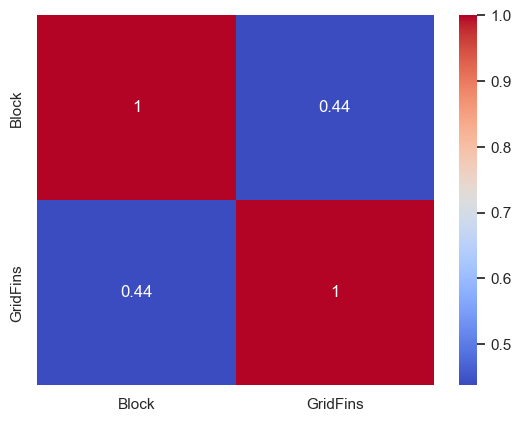

Block
1.0    0.368421
2.0    1.000000
3.0    0.800000
4.0    0.818182
5.0    0.923077
Name: GridFins, dtype: float64


In [40]:
import seaborn as sns
corr = data_falcon9[['Block', 'GridFins']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Grouping Block by GridFins to see distribution
gridfin_block = data_falcon9.groupby('Block')['GridFins'].mean()
print(gridfin_block)

## Part 3: Collecting Data from Web Scrapping

Since the data from the REST API is outdated, the rest of the will be web scrapped from the Falcon 9 wikipedia page using BeautifulSoup.

In [43]:
# Import required labraries for web scraping
from bs4 import BeautifulSoup
import re
import unicodedata
import sys
import requests
import re
import logging

***Generalized functions are needed for this task because the Falcon 9 data is seperated by periods into multiple Wikipeda pages***

In [45]:
# Generalized function to clean text
def clean_text(text):
    text = re.sub(r'\[.*?\]', '', text)  # Remove references
    text = re.sub(r'\(.*?\)', '', text)  # Remove parentheses content
    return text.replace('\xa0', ' ').strip()

# Generalized number-checking function to see if the first row is a number to filter out the Falcon Heavy version
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# Generalized table scraping function
def scrape_table_from_url(url, table_class='wikitable', table_type='table'):
    response = requests.get(url)
    
    if response.status_code != 200:
        logging.error(f"Failed to fetch the webpage. Status code: {response.status_code}")
        raise Exception(f"Failed to fetch the webpage. Status code: {response.status_code}")
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
  # Find all specified table types with the given class
    tables = soup.find_all(table_type, {'class': table_class})

    if not tables:
        logging.warning(f"No tables with class '{table_class}' found.")
        return pd.DataFrame()  # Return empty DataFrame if no tables found
    
    all_data = []
    headers = []

    # Loop through tables
    for table in tables:
        header_row = table.find('tr')
        if not header_row:
            logging.warning("No header row found in table, skipping.")
            continue  # Skip if no header row
        
        # Extract headers
        headers = [clean_text(th.text) for th in header_row.find_all(['th', 'td'])]
        
        # Extract rows
        for row in table.find_all('tr')[1:]:
            cells = row.find_all(['td', 'th'])
            row_data = [clean_text(cell.text) for cell in cells]
            
            # Append row if it matches header length and has a valid first column (e.g., number)
            if row_data and is_number(row_data[0]) and len(row_data) == len(headers):
                all_data.append(row_data)
    
    # Create a DataFrame
    df = pd.DataFrame(all_data, columns=headers)
    
    # Return the DataFrame
    return df

***Scraping the Falcon 9 launch data from Wikipedia pages***

In [47]:
# Url for Falcon 9 launches between 2010 and 2019
falcon9_2010_2019 = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches_(2010%E2%80%932019)"
data_2010_2019 = scrape_table_from_url(falcon9_2010_2019)
data_2010_2019.head()

,Flight No.,Date andtime,"Version,booster",Launchsite,Payload,Payload mass,Orbit,Customer,Launchoutcome,Boosterlanding
0,1,4 June 201018:45,F9 v1.0B0003,"Cape Canaveral, SLC‑40",Dragon Spacecraft Qualification Unit,Unknown,LEO,SpaceX,Success,Failure
1,2,8 December 201015:43,F9 v1.0B0004,"Cape Canaveral, SLC‑40",SpaceX COTS Demo Flight 1,Unknown,LEO,NASA,Success,Failure
2,3,22 May 201207:44,F9 v1.0B0005,"Cape Canaveral, SLC‑40",SpaceX COTS Demo Flight 2,525 kg,LEO,NASA,Success,No attempt
3,4,8 October 201200:35,F9 v1.0B0006,"Cape Canaveral, SLC‑40",SpaceX CRS-1,"4,700 kg",LEO,NASA,Success,No attempt
4,5,1 March 201315:10,F9 v1.0B0007,"Cape Canaveral, SLC‑40",SpaceX CRS-2,"4,877 kg",LEO,NASA,Success,No attempt


In [48]:
# Url for Falcon 9 launches between 2010 and 2019
falcon9_2020_2022 = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches_(2020%E2%80%932022)"
data_2020_2022 = scrape_table_from_url(falcon9_2020_2022)
data_2020_2022.head()

,Flight No.,Date andtime,"Version,booster",Launchsite,Payload,Payload mass,Orbit,Customer,Launchoutcome,Boosterlanding
0,78,7 January 202002:19:21,F9 B5B1049.4,"Cape Canaveral, SLC‑40",Starlink: Launch 2,"15,600 kg",LEO,SpaceX,Success,Success
1,79,19 January 202015:30,F9 B5B1046.4,"Kennedy, LC‑39A",Crew Dragon in-flight abort test,"12,050 kg",Sub-orbital,NASA,Successfulsimulatedfailure,No attempt
2,80,29 January 202014:07,F9 B5B1051.3,"Cape Canaveral, SLC‑40",Starlink: Launch 3,"15,600 kg",LEO,SpaceX,Success,Success
3,81,17 February 202015:05,F9 B5B1056.4,"Cape Canaveral, SLC‑40",Starlink: Launch 4,"15,600 kg",LEO,SpaceX,Success,Failure
4,82,7 March 202004:50,F9 B5B1059.2,"Cape Canaveral, SLC‑40",SpaceX CRS-20,"1,977 kg",LEO,NASA,Success,Success


In [49]:
# Url for Falcon 9 launches between 2010 and 2019
falcon9_2023_2024 = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches"
# Table class is different in this page
data_2023_2024 = scrape_table_from_url(falcon9_2023_2024,table_class="wikitable plainrowheaders collapsible sticky-header") 
data_2023_2024.head()

,Flight No.,Date andtime,"Version,booster",Launchsite,Payload,Payload mass,Orbit,Customer,Launchoutcome,Boosterlanding
0,195,3 January 202314:56,F9 B5B1060.15,"Cape Canaveral, SLC‑40",Transporter-6,Unknown,SSO,Various,Success,Success
1,196,10 January 202304:50,F9 B5B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16,"6,000 kg",Polar LEO,OneWeb,Success,Success
2,197,18 January 202312:24,F9 B5B1077.2,"Cape Canaveral, SLC‑40",USA-343,"4,352 kg",MEO,USSF,Success,Success
3,198,19 January 202315:43,F9 B5B1075.1,"Vandenberg, SLC‑4E",Starlink: Group 2-4,"15,000 kg",LEO,SpaceX,Success,Success
4,199,26 January 202309:32,F9 B5B1067.9,"Cape Canaveral, SLC‑40",Starlink: Group 5-2,"~17,400 kg",LEO,SpaceX,Success,Success


In [50]:
# Merge the dataframes into a single dataset
df_falcon = pd.concat([data_2010_2019, data_2020_2022, data_2023_2024], ignore_index=True)
df_falcon.head()

,Flight No.,Date andtime,"Version,booster",Launchsite,Payload,Payload mass,Orbit,Customer,Launchoutcome,Boosterlanding
0,1,4 June 201018:45,F9 v1.0B0003,"Cape Canaveral, SLC‑40",Dragon Spacecraft Qualification Unit,Unknown,LEO,SpaceX,Success,Failure
1,2,8 December 201015:43,F9 v1.0B0004,"Cape Canaveral, SLC‑40",SpaceX COTS Demo Flight 1,Unknown,LEO,NASA,Success,Failure
2,3,22 May 201207:44,F9 v1.0B0005,"Cape Canaveral, SLC‑40",SpaceX COTS Demo Flight 2,525 kg,LEO,NASA,Success,No attempt
3,4,8 October 201200:35,F9 v1.0B0006,"Cape Canaveral, SLC‑40",SpaceX CRS-1,"4,700 kg",LEO,NASA,Success,No attempt
4,5,1 March 201315:10,F9 v1.0B0007,"Cape Canaveral, SLC‑40",SpaceX CRS-2,"4,877 kg",LEO,NASA,Success,No attempt


In [51]:
df_falcon.shape

(391, 10)

## Part 4: Data Wrangling for the Web Scraped Data

In [53]:
data_falcon9.tail()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
85,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCSFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,8,B1062,-80.577366,28.561857


In [54]:
data_falcon9.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [55]:
data_falcon9["LaunchSite"].value_counts()

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [56]:
data_falcon9["Orbit"].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [57]:
landing_outcomes=data_falcon9["Outcome"].value_counts()
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [58]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [59]:
(data_falcon9["Outcome"]=="None None").sum()

19

In [60]:
(data_falcon9["Outcome"]=="None ASDS").sum()

2

In [61]:
landing_class = [1 if outcome not in bad_outcomes else 0 for outcome in data_falcon9['Outcome']]

In [62]:
data_falcon9["Class"]=landing_class

In [63]:
data_falcon9["Class"].mean()

0.6666666666666666

In [64]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0


In [65]:
print(df_falcon.columns)

Index(['Flight No.', 'Date andtime', 'Version,booster', 'Launchsite',
       'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome',
       'Boosterlanding'],
      dtype='object')


In [66]:
# Rename the column names
df_falcon.columns=df_falcon.columns.astype(str) # Make sure the columns are strings
new_columns=[] # Ensure that there are no whitespace within column names
for col in df_falcon.columns:
    new_columns.append(col.strip())
new_names={"Flight No.":"Flight_No","Payload mass":"Payload_Mass","Date andtime":"Date","Version,booster":"Booster_Version","Outcome":"Launch","Boosterlanding":"Landing"}
df_falcon=df_falcon.rename(columns=new_names)

In [67]:
df_falcon.columns

Index(['Flight_No', 'Date', 'Booster_Version', 'Launchsite', 'Payload',
       'Payload_Mass', 'Orbit', 'Customer', 'Launchoutcome', 'Landing'],
      dtype='object')

In [68]:
data_falcon9.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,None,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,None,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1011,-80.577366,28.561857,0


In [69]:
# Check the booster version column to identify regular expression (regex) patterns
df_falcon["Booster_Version"].unique()

array(['F9 v1.0B0003', 'F9 v1.0B0004', 'F9 v1.0B0005', 'F9 v1.0B0006',
       'F9 v1.0B0007', 'F9 v1.1B1003', 'F9 v1.1B1004', 'F9 v1.1B1005',
       'F9 v1.1B1006', 'F9 v1.1B1007', 'F9 v1.1B1008', 'F9 v1.1B1011',
       'F9 v1.1B1010', 'F9 v1.1B1012', 'F9 v1.1B1013', 'F9 v1.1B1014',
       'F9 v1.1B1015', 'F9 v1.1B1016', 'F9 v1.1B1018', 'F9 FTB1019',
       'F9 v1.1B1017', 'F9 FTB1020', 'F9 FTB1021.1', 'F9 FTB1022',
       'F9 FTB1023.1', 'F9 FTB1024', 'F9 FTB1025.1', 'F9 FTB1026',
       'F9 FTB1029.1', 'F9 FTB1031.1', 'F9 FTB1030', 'F9 FTB1021.2',
       'F9 FTB1032.1', 'F9 FTB1034.1', 'F9 FTB1035.1', 'F9 FTB1029.2',
       'F9 FTB1036.1', 'F9 FTB1037.1', 'F9 B4B1039.1', 'F9 FTB1038.1',
       'F9 B4B1040.1', 'F9 B4B1041.1', 'F9 FTB1031.2', 'F9 B4B1042.1',
       'F9 FTB1035.2', 'F9 FTB1036.2', 'F9 B4B1043.1', 'F9 FTB1032.2',
       'F9 FTB1038.2', 'F9 B4B1044.1', 'F9 B4B1041.2', 'F9 B4B1039.2',
       'F9 B4B1045.1', 'F9 B5B1046.1', 'F9 B4B1043.2', 'F9 B4B1040.2',
       'F9 B4B1045

In [70]:
# Define a function to split and update the booster version column, returning the trailing part
def split_booster_version(booster_version):
    # Regex to capture core and trailing parts
    match = re.match(r"(F9 (?:v1\.0|v1\.1|FT|B5|B4)) ?(B\d{4}(?:\.\d{1,2})?)?", booster_version)
    
    if match:
        # Extract the core and trailing parts
        core_part = match.group(1)
        trailing_part = match.group(2) if match.group(2) else ''
        return core_part, trailing_part
    return booster_version, ''

# Apply the function to update the original column and create a new trailing column
df_falcon[['Booster_Version', 'Serial_Number']] = df_falcon['Booster_Version'].apply(lambda x: pd.Series(split_booster_version(x)))

In [71]:
df_falcon

,Flight_No,Date,Booster_Version,Launchsite,Payload,Payload_Mass,Orbit,Customer,Launchoutcome,Landing,Serial_Number
0,1,4 June 201018:45,F9 v1.0,"Cape Canaveral, SLC‑40",Dragon Spacecraft Qualification Unit,Unknown,LEO,SpaceX,Success,Failure,B0003
1,2,8 December 201015:43,F9 v1.0,"Cape Canaveral, SLC‑40",SpaceX COTS Demo Flight 1,Unknown,LEO,NASA,Success,Failure,B0004
2,3,22 May 201207:44,F9 v1.0,"Cape Canaveral, SLC‑40",SpaceX COTS Demo Flight 2,525 kg,LEO,NASA,Success,No attempt,B0005
3,4,8 October 201200:35,F9 v1.0,"Cape Canaveral, SLC‑40",SpaceX CRS-1,"4,700 kg",LEO,NASA,Success,No attempt,B0006
4,5,1 March 201315:10,F9 v1.0,"Cape Canaveral, SLC‑40",SpaceX CRS-2,"4,877 kg",LEO,NASA,Success,No attempt,B0007
...,...,...,...,...,...,...,...,...,...,...,...
386,387,30 October 202412:07,F9 B5,"Vandenberg, SLC-4E",Starlink: Group 9-9,"~16,300 kg",LEO,SpaceX,Success,Success,B1075.14
387,388,30 October 202421:10,F9 B5,"Cape Canaveral, SLC‑40",Starlink: Group 10-13,"~17,100 kg",LEO,SpaceX,Success,Success,B1078.14
388,389,5 November 202402:29,F9 B5,"Kennedy, LC‑39A",SpaceX CRS-31,"2,762 kg",LEO,NASA,Success,Success,B1083.5
389,390,7 November 202420:19,F9 B5,"Cape Canaveral, SLC‑40",Starlink: Group 6-77,"~17,100 kg",LEO,SpaceX,Success,Success,B1085.3


In [72]:
# Define another function to format the date and time column
def split_date_and_time (date_time):
    # Regex pattern to match the date and time
    match = re.match(r"(\d{1,2} \w+ \d{4})(\d{2}:\d{2})", date_time)

    if match:
        date_part=match.group(1)
        time_part=match.group(2)
        return date_part, time_part
    return date_time, ''

# Apply the function

df_falcon[["Date","Time"]]=df_falcon["Date"].apply(lambda x: pd.Series (split_date_and_time(x)))
df_falcon

,Flight_No,Date,Booster_Version,Launchsite,Payload,Payload_Mass,Orbit,Customer,Launchoutcome,Landing,Serial_Number,Time
0,1,4 June 2010,F9 v1.0,"Cape Canaveral, SLC‑40",Dragon Spacecraft Qualification Unit,Unknown,LEO,SpaceX,Success,Failure,B0003,18:45
1,2,8 December 2010,F9 v1.0,"Cape Canaveral, SLC‑40",SpaceX COTS Demo Flight 1,Unknown,LEO,NASA,Success,Failure,B0004,15:43
2,3,22 May 2012,F9 v1.0,"Cape Canaveral, SLC‑40",SpaceX COTS Demo Flight 2,525 kg,LEO,NASA,Success,No attempt,B0005,07:44
3,4,8 October 2012,F9 v1.0,"Cape Canaveral, SLC‑40",SpaceX CRS-1,"4,700 kg",LEO,NASA,Success,No attempt,B0006,00:35
4,5,1 March 2013,F9 v1.0,"Cape Canaveral, SLC‑40",SpaceX CRS-2,"4,877 kg",LEO,NASA,Success,No attempt,B0007,15:10
...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,30 October 2024,F9 B5,"Vandenberg, SLC-4E",Starlink: Group 9-9,"~16,300 kg",LEO,SpaceX,Success,Success,B1075.14,12:07
387,388,30 October 2024,F9 B5,"Cape Canaveral, SLC‑40",Starlink: Group 10-13,"~17,100 kg",LEO,SpaceX,Success,Success,B1078.14,21:10
388,389,5 November 2024,F9 B5,"Kennedy, LC‑39A",SpaceX CRS-31,"2,762 kg",LEO,NASA,Success,Success,B1083.5,02:29
389,390,7 November 2024,F9 B5,"Cape Canaveral, SLC‑40",Starlink: Group 6-77,"~17,100 kg",LEO,SpaceX,Success,Success,B1085.3,20:19


In [73]:
df_falcon.columns

Index(['Flight_No', 'Date', 'Booster_Version', 'Launchsite', 'Payload',
       'Payload_Mass', 'Orbit', 'Customer', 'Launchoutcome', 'Landing',
       'Serial_Number', 'Time'],
      dtype='object')

In [74]:
df_falcon.dtypes

Flight_No          object
Date               object
Booster_Version    object
Launchsite         object
Payload            object
Payload_Mass       object
Orbit              object
Customer           object
Launchoutcome      object
Landing            object
Serial_Number      object
Time               object
dtype: object

In [75]:
# Convert datatypes appropriatly
df_falcon["Flight_No"] = pd.to_numeric(df_falcon["Flight_No"], errors='coerce').astype('int64') # Convert flight no to integer

df_falcon["Time"] = pd.to_datetime(df_falcon["Time"], format='%H:%M').dt.time # Convert time values to time

# Define a function to clean payload mass values
def clean_weights(weight):
    # Replace 'Unknown' with NaN
    if weight == 'Unknown':
        return np.nan
    
    # Remove '~' and 'kg', then strip spaces
    weight = weight.replace('~', '').replace('kg', '').replace(',', '').strip()
    
    # Convert to numeric (float), if conversion fails, it returns NaN
    return pd.to_numeric(weight, errors='coerce')

# Apply the function to the 'weights' column
df_falcon["Payload_Mass"] = df_falcon["Payload_Mass"].apply(clean_weights)

In [76]:
# Change the order of the columns
new_order=["Flight_No","Serial_Number","Booster_Version","Date","Time","Customer","Orbit","Payload_Mass","Launchsite","Launchoutcome","Landing"]
df_falcon=df_falcon.reindex(columns=new_order)
df_falcon

,Flight_No,Serial_Number,Booster_Version,Date,Time,Customer,Orbit,Payload_Mass,Launchsite,Launchoutcome,Landing
0,1,B0003,F9 v1.0,4 June 2010,18:45:00,SpaceX,LEO,NaN,"Cape Canaveral, SLC‑40",Success,Failure
1,2,B0004,F9 v1.0,8 December 2010,15:43:00,NASA,LEO,NaN,"Cape Canaveral, SLC‑40",Success,Failure
2,3,B0005,F9 v1.0,22 May 2012,07:44:00,NASA,LEO,525.0,"Cape Canaveral, SLC‑40",Success,No attempt
3,4,B0006,F9 v1.0,8 October 2012,00:35:00,NASA,LEO,4700.0,"Cape Canaveral, SLC‑40",Success,No attempt
4,5,B0007,F9 v1.0,1 March 2013,15:10:00,NASA,LEO,4877.0,"Cape Canaveral, SLC‑40",Success,No attempt
...,...,...,...,...,...,...,...,...,...,...,...
386,387,B1075.14,F9 B5,30 October 2024,12:07:00,SpaceX,LEO,16300.0,"Vandenberg, SLC-4E",Success,Success
387,388,B1078.14,F9 B5,30 October 2024,21:10:00,SpaceX,LEO,17100.0,"Cape Canaveral, SLC‑40",Success,Success
388,389,B1083.5,F9 B5,5 November 2024,02:29:00,NASA,LEO,2762.0,"Kennedy, LC‑39A",Success,Success
389,390,B1085.3,F9 B5,7 November 2024,20:19:00,SpaceX,LEO,17100.0,"Cape Canaveral, SLC‑40",Success,Success


In [77]:
# Add longitude and latitude values for launch sites

# Add Cape Canaveral
df_falcon.loc[df_falcon["Launchsite"].str.contains("SLC‑40"), "Longitude"]= -80.577366
df_falcon.loc[df_falcon["Launchsite"].str.contains("SLC‑40"), "Latitude"]= 28.561857

# Add Vandenberg
df_falcon.loc[df_falcon["Launchsite"].str.contains("SLC-4E"), "Longitude"]= -120.610829
df_falcon.loc[df_falcon["Launchsite"].str.contains("SLC-4E"), "Latitude"]= 34.632093

# Add Kennedy
df_falcon.loc[df_falcon["Launchsite"].str.contains("LC‑39A"), "Longitude"]= -80.603956
df_falcon.loc[df_falcon["Launchsite"].str.contains("LC‑39A"), "Latitude"]= 28.608058

df_falcon

,Flight_No,Serial_Number,Booster_Version,Date,Time,Customer,Orbit,Payload_Mass,Launchsite,Launchoutcome,Landing,Longitude,Latitude
0,1,B0003,F9 v1.0,4 June 2010,18:45:00,SpaceX,LEO,NaN,"Cape Canaveral, SLC‑40",Success,Failure,-80.577366,28.561857
1,2,B0004,F9 v1.0,8 December 2010,15:43:00,NASA,LEO,NaN,"Cape Canaveral, SLC‑40",Success,Failure,-80.577366,28.561857
2,3,B0005,F9 v1.0,22 May 2012,07:44:00,NASA,LEO,525.0,"Cape Canaveral, SLC‑40",Success,No attempt,-80.577366,28.561857
3,4,B0006,F9 v1.0,8 October 2012,00:35:00,NASA,LEO,4700.0,"Cape Canaveral, SLC‑40",Success,No attempt,-80.577366,28.561857
4,5,B0007,F9 v1.0,1 March 2013,15:10:00,NASA,LEO,4877.0,"Cape Canaveral, SLC‑40",Success,No attempt,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,B1075.14,F9 B5,30 October 2024,12:07:00,SpaceX,LEO,16300.0,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093
387,388,B1078.14,F9 B5,30 October 2024,21:10:00,SpaceX,LEO,17100.0,"Cape Canaveral, SLC‑40",Success,Success,-80.577366,28.561857
388,389,B1083.5,F9 B5,5 November 2024,02:29:00,NASA,LEO,2762.0,"Kennedy, LC‑39A",Success,Success,-80.603956,28.608058
389,390,B1085.3,F9 B5,7 November 2024,20:19:00,SpaceX,LEO,17100.0,"Cape Canaveral, SLC‑40",Success,Success,-80.577366,28.561857


In [78]:
df_falcon.isnull().sum() # Check the number of null values 

Flight_No           0
Serial_Number       0
Booster_Version     0
Date                0
Time                1
Customer            0
Orbit               0
Payload_Mass       27
Launchsite          0
Launchoutcome       0
Landing             0
Longitude          87
Latitude           87
dtype: int64

In [79]:
print(df_falcon["Payload_Mass"].isnull().sum()) # Check the number of null values

27


In [80]:
# Some payload mass values are classified or unknown
df_falcon.loc[df_falcon["Payload_Mass"].isnull()] # Locate the missing payload mass values and check if they are classified or unknown

,Flight_No,Serial_Number,Booster_Version,Date,Time,Customer,Orbit,Payload_Mass,Launchsite,Launchoutcome,Landing,Longitude,Latitude
0,1,B0003,F9 v1.0,4 June 2010,18:45:00,SpaceX,LEO,NaN,"Cape Canaveral, SLC‑40",Success,Failure,-80.577366,28.561857
1,2,B0004,F9 v1.0,8 December 2010,15:43:00,NASA,LEO,NaN,"Cape Canaveral, SLC‑40",Success,Failure,-80.577366,28.561857
32,33,B1032.1,F9 FT,1 May 2017,11:15:00,NRO,LEO,NaN,"Kennedy, LC‑39A",Success,Success,-80.603956,28.608058
40,41,B1040.1,F9 B4,7 September 2017,14:00:00,USAF,LEO,NaN,"Kennedy, LC‑39A",Success,Success,-80.603956,28.608058
46,47,B1043.1,F9 B4,8 January 2018,01:00:00,Unspecified U.S. government agency,LEO,NaN,"Cape Canaveral, SLC‑40",Success,Success,-80.577366,28.561857
88,89,B1058.2,F9 B5,20 July 2020,21:30:00,Republic of Korea Army,GTO,NaN,"Cape Canaveral, SLC‑40",Success,Success,-80.577366,28.561857
102,103,B1059.5,F9 B5,19 December 2020,14:00:00,NRO,LEO,NaN,"Kennedy, LC‑39A",Success,Success,-80.603956,28.608058
122,123,B1060.8,F9 B5,30 June 2021,19:31:00,Various,SSO,NaN,"Cape Canaveral, SLC‑40",Success,Success,-80.577366,28.561857
135,136,B1058.10,F9 B5,13 January 2022,15:25:00,Various,SSO,NaN,"Cape Canaveral, SLC‑40",Success,Success,-80.577366,28.561857
138,139,B1071.1,F9 B5,2 February 2022,20:27:00,NRO,SSO,NaN,"Vandenberg, SLC‑4E",Success,Success,NaN,NaN


In [81]:
# Checking if the missing values whether classified/unknown has done by manually
# 2 instances has found that the values were mislabeled

df_falcon.loc[40, "Payload_Mass"]=4990 # Locate and fix the value
df_falcon.loc[89,"Payload_Mass"]=5500 # Locate and fix the value

In [82]:
df_falcon.loc[df_falcon["Time"].isnull()] # Check the row with the missing time value

,Flight_No,Serial_Number,Booster_Version,Date,Time,Customer,Orbit,Payload_Mass,Launchsite,Launchoutcome,Landing,Longitude,Latitude
215,216,B1076.4,F9 B5,7 April 2023 04:30,NaT,Intelsat,GTO,5588.0,"Cape Canaveral, SLC‑40",Success,Success,-80.577366,28.561857


In [83]:
df_falcon.loc[215,"Time"]=04.30

In [84]:
df_falcon.loc[215, "Date"]="7 April 2023"

In [85]:
# Export the dataset as it is to save it for later
df_falcon.to_csv("spacexf9.csv",index=False)

In [86]:
# Add new feautures in order to make the dataset more detailed for machine learning models and analyses
df_falcon["Reused"] = df_falcon["Serial_Number"].apply(lambda x: "True" if "." in x else "False")
df_falcon["FlightCount"] = df_falcon["Serial_Number"].apply(lambda x: x.split(".")[1] if "." in x else 1)
df_falcon["Block"] = df_falcon["Booster_Version"].apply(lambda x: x.split("F9 ")[1])

In [87]:
df_falcon["Serial_Number"]=df_falcon["Serial_Number"].apply(lambda x: re.sub(r'\.\d+', '', x))
df_falcon

,Flight_No,Serial_Number,Booster_Version,Date,Time,Customer,Orbit,Payload_Mass,Launchsite,Launchoutcome,Landing,Longitude,Latitude,Reused,FlightCount,Block
0,1,B0003,F9 v1.0,4 June 2010,18:45:00,SpaceX,LEO,NaN,"Cape Canaveral, SLC‑40",Success,Failure,-80.577366,28.561857,False,1,v1.0
1,2,B0004,F9 v1.0,8 December 2010,15:43:00,NASA,LEO,NaN,"Cape Canaveral, SLC‑40",Success,Failure,-80.577366,28.561857,False,1,v1.0
2,3,B0005,F9 v1.0,22 May 2012,07:44:00,NASA,LEO,525.0,"Cape Canaveral, SLC‑40",Success,No attempt,-80.577366,28.561857,False,1,v1.0
3,4,B0006,F9 v1.0,8 October 2012,00:35:00,NASA,LEO,4700.0,"Cape Canaveral, SLC‑40",Success,No attempt,-80.577366,28.561857,False,1,v1.0
4,5,B0007,F9 v1.0,1 March 2013,15:10:00,NASA,LEO,4877.0,"Cape Canaveral, SLC‑40",Success,No attempt,-80.577366,28.561857,False,1,v1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,B1075,F9 B5,30 October 2024,12:07:00,SpaceX,LEO,16300.0,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,14,B5
387,388,B1078,F9 B5,30 October 2024,21:10:00,SpaceX,LEO,17100.0,"Cape Canaveral, SLC‑40",Success,Success,-80.577366,28.561857,True,14,B5
388,389,B1083,F9 B5,5 November 2024,02:29:00,NASA,LEO,2762.0,"Kennedy, LC‑39A",Success,Success,-80.603956,28.608058,True,5,B5
389,390,B1085,F9 B5,7 November 2024,20:19:00,SpaceX,LEO,17100.0,"Cape Canaveral, SLC‑40",Success,Success,-80.577366,28.561857,True,3,B5


In [88]:
# Convert the columns GridFins and Legs to objects from bool in order to apply merging and keep the missing values
data_falcon9=data_falcon9.astype({"GridFins":object, "Legs":object})

In [89]:
# Rename the date column in the REST API dataset to prevent any mismatch
data_falcon9=data_falcon9.rename(columns={"Date":"Datet"})

In [90]:
# Check the datatypes before applying the merge function to ensure there are no mismatches
print(df_falcon[['Serial_Number', 'Date']].dtypes)
print(data_falcon9[['Serial', 'Datet']].dtypes)

Serial_Number    object
Date             object
dtype: object
Serial    object
Datet     object
dtype: object


In [91]:
# Make sure they have the same data type
df_falcon['Serial_Number'] = df_falcon['Serial_Number'].astype(str)
data_falcon9['Serial'] = data_falcon9['Serial'].astype(str)

In [92]:
# Standardize the date format
df_falcon['Date'] = pd.to_datetime(df_falcon['Date'])
data_falcon9['Datet'] = pd.to_datetime(data_falcon9['Datet'])

In [93]:
# Check for leading/trailing spaces which could cause mismatches
df_falcon['Serial_Number'] = df_falcon['Serial_Number'].str.strip()
data_falcon9['Serial'] = data_falcon9['Serial'].str.strip()

In [94]:
# For the values included in the data from the REST API, incorporate them using merge method
df_falcon = pd.merge(df_falcon, data_falcon9[["Serial", "Datet", "GridFins", "Legs"]],
                     left_on=["Serial_Number", "Date"],
                     right_on=["Serial", "Datet"],
                     how="left")

# Drop the unused columns
df_falcon.drop(columns=["Serial", "Datet"], inplace=True)

In [95]:
data_falcon9.loc[data_falcon9["Serial"].str.contains("B1051")]

,FlightNumber,Datet,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
62,63,2019-03-02,Falcon 9,12259.0,ISS,KSC LC 39A,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
65,66,2019-06-12,Falcon 9,1425.0,SSO,VAFB SLC 4E,True RTLS,2,True,True,True,5e9e3032383ecb554034e7c9,5.0,12,B1051,-120.610829,34.632093,1
73,74,2020-01-29,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.577366,28.561857,1
77,78,2020-04-22,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1


In [96]:
# Check the missing values after merging
df_falcon.isnull().sum()

Flight_No            0
Serial_Number        0
Booster_Version      0
Date                 0
Time                 0
Customer             0
Orbit                0
Payload_Mass        26
Launchsite           0
Launchoutcome        0
Landing              0
Longitude           87
Latitude            87
Reused               0
FlightCount          0
Block                0
GridFins           302
Legs               302
dtype: int64

## Part 5: Feature Engineering for the Missing  Data

Missing payload mass data is not possible to find since they are all classified or simply just missing. Likewise, it is very difficult to find the missing data for legs and grid fins usage because there are multiple versions within each Block of Falcon 9 rockets with and without legs/grid fins. Therefore, the best way to find out these 290 missing values is to apply feature engineering.

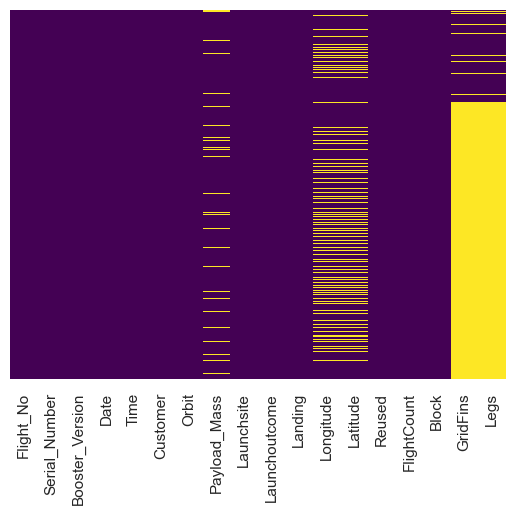

In [99]:
# Create a heatmap to visualize the missing values
sns.heatmap(df_falcon.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [100]:
# Check how many missing values are there for GridFins and Legs
print(df_falcon['GridFins'].isnull().sum())
print(df_falcon['Legs'].isnull().sum())

302
302


In [101]:
# Check the number of unique values for categorical values
df_falcon.nunique()

Flight_No          391
Serial_Number       72
Booster_Version      5
Date               372
Time               334
Customer            74
Orbit               16
Payload_Mass       152
Launchsite           4
Launchoutcome        3
Landing              6
Longitude            3
Latitude             3
Reused               2
FlightCount         24
Block                5
GridFins             2
Legs                 2
dtype: int64

As it is seen, there is a problem with the number of Launchsite categories since there should be only 3 launch sites. Also, Landing feature has 6 different categories which it is possible reduce it to 2 (Success/Failure).

In [103]:
# Check if the data needs more preprocessing before developing the prediction model
df_falcon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Flight_No        391 non-null    int64         
 1   Serial_Number    391 non-null    object        
 2   Booster_Version  391 non-null    object        
 3   Date             391 non-null    datetime64[ns]
 4   Time             391 non-null    object        
 5   Customer         391 non-null    object        
 6   Orbit            391 non-null    object        
 7   Payload_Mass     365 non-null    float64       
 8   Launchsite       391 non-null    object        
 9   Launchoutcome    391 non-null    object        
 10  Landing          391 non-null    object        
 11  Longitude        304 non-null    float64       
 12  Latitude         304 non-null    float64       
 13  Reused           391 non-null    object        
 14  FlightCount      391 non-null    object   

There are few things required to be fixed: FlightCount has the wrong dtype, landing outcome has more than 6 categories, Block feature is missing,

In [105]:
# Convert the wrong dtype to int
df_falcon["FlightCount"]=df_falcon["FlightCount"].astype(int)

In [106]:
# Check the categories for Landing feature
df_falcon["Landing"].unique()

array(['Failure', 'No attempt', 'Controlled', 'Precluded', 'Success',
       'Partial failure'], dtype=object)

In [107]:
# Locate and fix the "Successfulsimulatedfailure" value
df_falcon.loc[df_falcon["Launchoutcome"].str.contains("Successfulsimulatedfailure")]

,Flight_No,Serial_Number,Booster_Version,Date,Time,Customer,Orbit,Payload_Mass,Launchsite,Launchoutcome,Landing,Longitude,Latitude,Reused,FlightCount,Block,GridFins,Legs
78,79,B1046,F9 B5,2020-01-19,15:30:00,NASA,Sub-orbital,12050.0,"Kennedy, LC‑39A",Successfulsimulatedfailure,No attempt,-80.603956,28.608058,True,4,B5,False,False


In [108]:
df_falcon.loc[78,"Launchoutcome"]="Failure"

In [109]:
# Create a new column named Block with the information from Bosster_Version
df_falcon["Block"] = df_falcon["Booster_Version"].apply(lambda x: x.split("F9 ")[1])

In [110]:
# Check the categories of launchsite
df_falcon["Launchsite"].unique()

array(['Cape Canaveral, SLC‑40', 'Vandenberg, SLC‑4E', 'Kennedy, LC‑39A',
       'Vandenberg, SLC-4E'], dtype=object)

In [111]:
df_falcon.loc[df_falcon["Launchsite"].str.contains("Vandenberg, SLC-4E")]

,Flight_No,Serial_Number,Booster_Version,Date,Time,Customer,Orbit,Payload_Mass,Launchsite,Launchoutcome,Landing,Longitude,Latitude,Reused,FlightCount,Block,GridFins,Legs
364,365,B1075,F9 B5,2024-08-16,18:56:00,Various,SSO,NaN,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,12,B5,NaN,NaN
368,369,B1081,F9 B5,2024-08-31,08:48:00,SpaceX,LEO,16700.0,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,9,B5,NaN,NaN
373,374,B1071,F9 B5,2024-09-13,01:45:00,SpaceX,LEO,16700.0,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,18,B5,NaN,NaN
375,376,B1075,F9 B5,2024-09-20,13:50:00,SpaceX,LEO,16300.0,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,13,B5,NaN,NaN
376,377,B1081,F9 B5,2024-09-25,04:01:00,SpaceX,LEO,16300.0,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,10,B5,NaN,NaN
380,381,B1071,F9 B5,2024-10-15,08:21:00,SpaceX,LEO,16300.0,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,19,B5,NaN,NaN
382,383,B1082,F9 B5,2024-10-20,05:13:00,OneWeb,Polar LEO,2954.0,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,7,B5,NaN,NaN
384,385,B1063,F9 B5,2024-10-24,17:13:00,NRO,LEO,NaN,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,21,B5,NaN,NaN
386,387,B1075,F9 B5,2024-10-30,12:07:00,SpaceX,LEO,16300.0,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,14,B5,NaN,NaN
390,391,B1081,F9 B5,2024-11-09,06:14:00,SpaceX,LEO,16300.0,"Vandenberg, SLC-4E",Success,Success,-120.610829,34.632093,True,11,B5,NaN,NaN


In [112]:
df_falcon.loc[df_falcon["Launchsite"].str.contains("Vandenberg, SLC‑4E")]

,Flight_No,Serial_Number,Booster_Version,Date,Time,Customer,Orbit,Payload_Mass,Launchsite,Launchoutcome,Landing,Longitude,Latitude,Reused,FlightCount,Block,GridFins,Legs
5,6,B1003,F9 v1.1,2013-09-29,16:00:00,MDA,Polar orbit LEO,500.0,"Vandenberg, SLC‑4E",Success,Failure,NaN,NaN,False,1,v1.1,False,False
20,21,B1017,F9 v1.1,2016-01-17,18:42:00,NASA \nNOAA\nCNES,LEO,553.0,"Vandenberg, SLC‑4E",Success,Failure,NaN,NaN,False,1,v1.1,True,True
28,29,B1029,F9 FT,2017-01-14,17:54:00,Iridium Communications,Polar LEO,9600.0,"Vandenberg, SLC‑4E",Success,Success,NaN,NaN,True,1,FT,True,True
36,37,B1036,F9 FT,2017-06-25,20:25:00,Iridium Communications,LEO,9600.0,"Vandenberg, SLC‑4E",Success,Success,NaN,NaN,True,1,FT,True,True
39,40,B1038,F9 FT,2017-08-24,18:51:00,NSPO,SSO,475.0,"Vandenberg, SLC‑4E",Success,Success,NaN,NaN,True,1,FT,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,354,B1063,F9 B5,2024-07-12,02:35:00,SpaceX,LEO,16300.0,"Vandenberg, SLC‑4E",Failure,Success,NaN,NaN,True,19,B5,NaN,NaN
356,357,B1071,F9 B5,2024-07-28,09:22:00,SpaceX,LEO,16500.0,"Vandenberg, SLC‑4E",Success,Success,NaN,NaN,True,17,B5,NaN,NaN
358,359,B1082,F9 B5,2024-08-04,07:24:00,SpaceX,LEO,17100.0,"Vandenberg, SLC‑4E",Success,Success,NaN,NaN,True,6,B5,NaN,NaN
361,362,B1061,F9 B5,2024-08-12,02:02:00,Space Norway,Molniya,7230.0,"Vandenberg, SLC‑4E",Success,Success,NaN,NaN,True,22,B5,NaN,NaN


In [113]:
# Locate and fix the launch site issue
df_falcon.loc[[365,369,374,376,377],"Launchsite"] = "Vandenberg, SLC‑4E"

# Check the number of unique values for launchsite
print(df_falcon["Launchsite"].nunique())
print(df_falcon["Launchsite"].unique())

4
['Cape Canaveral, SLC‑40' 'Vandenberg, SLC‑4E' 'Kennedy, LC‑39A'
 'Vandenberg, SLC-4E']


In [114]:
# Since issue persists, check if there is any trailing whitespace and remove them if any
df_falcon["Launchsite"].str.strip()
df_falcon["Launchsite"].nunique()

4

In [115]:
# Even after removing the trailing whitespace did not solve the issue, another method has been applied
def standardize_launch_sites(df_falcon):
    # Create a mapping dictionary for standardization
    standardization_map = {
        'Vandenberg, SLC‑4E': 'Vandenberg, SLC-4E',  # Convert en dash to regular hyphen
        'Cape Canaveral, SLC‑40': 'Cape Canaveral, SLC-40'  # Convert en dash to regular hyphen
    }
    
    # Print unique values before standardization
    print("Unique values before standardization:")
    print(df_falcon['Launchsite'].unique())
    
    # Apply the standardization
    df_falcon['Launchsite'] = df_falcon['Launchsite'].replace(standardization_map)
    
    # Print unique values after standardization
    print("\nUnique values after standardization:")
    print(df_falcon['Launchsite'].unique())
    
    return df_falcon
    
df_falcon = standardize_launch_sites(df_falcon)

Unique values before standardization:
['Cape Canaveral, SLC‑40' 'Vandenberg, SLC‑4E' 'Kennedy, LC‑39A'
 'Vandenberg, SLC-4E']

Unique values after standardization:
['Cape Canaveral, SLC-40' 'Vandenberg, SLC-4E' 'Kennedy, LC‑39A']


In [116]:
# Check the number of unique values for launchsite
print(df_falcon["Launchsite"].nunique())
print(df_falcon["Launchsite"].unique())

3
['Cape Canaveral, SLC-40' 'Vandenberg, SLC-4E' 'Kennedy, LC‑39A']


In [117]:
# Check if there is missing values
df_falcon.isnull().sum()

Flight_No            0
Serial_Number        0
Booster_Version      0
Date                 0
Time                 0
Customer             0
Orbit                0
Payload_Mass        26
Launchsite           0
Launchoutcome        0
Landing              0
Longitude           87
Latitude            87
Reused               0
FlightCount          0
Block                0
GridFins           302
Legs               302
dtype: int64

In [118]:
# Add missing values for Vandenberg 
df_falcon.loc[df_falcon["Launchsite"].str.contains("SLC-4E"), "Longitude"]= -120.610829
df_falcon.loc[df_falcon["Launchsite"].str.contains("SLC-4E"), "Latitude"]= 34.632093

df_falcon.isnull().sum()

Flight_No            0
Serial_Number        0
Booster_Version      0
Date                 0
Time                 0
Customer             0
Orbit                0
Payload_Mass        26
Launchsite           0
Launchoutcome        0
Landing              0
Longitude            0
Latitude             0
Reused               0
FlightCount          0
Block                0
GridFins           302
Legs               302
dtype: int64

Due to missing payload mass data, it is required to make a decision before developing a machine learning model to predict Legs and GridFins data. There are few options to follow: dropping the rows with missing data, imputing the missing values, leaving them as missing. Before making decision, it is best to see if payload mass is correlated with GridFins or Legs. Of course, payload mass might be a correlated feature to predict launch or landing outcome. Though, as it will be explained later, there is a weak correlation between payload mass and launh or landing outcome. In addition, the amount of missing values of payload mass is only 6.6% of the dataset. Therefore, it is possible to drop them if they are not correlated for prediction of grid fins or legs.

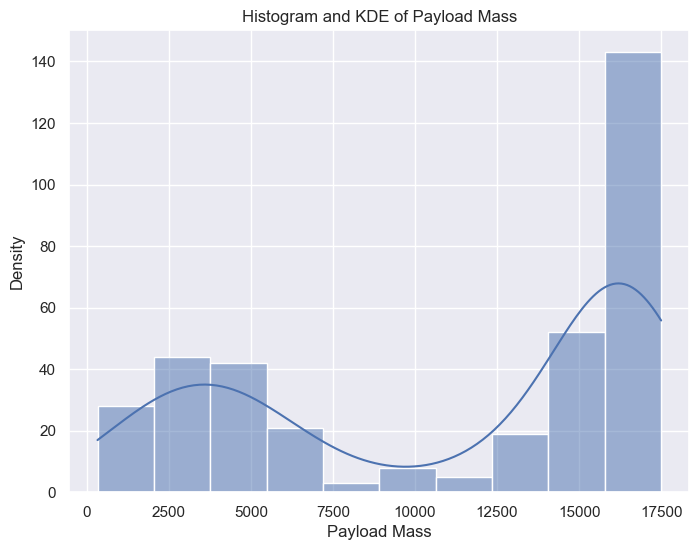

In [120]:
# Check visually if the payload mass data is normally distributed
plt.figure(figsize=(8, 6))
sns.histplot(df_falcon['Payload_Mass'].dropna(), kde=True)
plt.title('Histogram and KDE of Payload Mass')
plt.xlabel('Payload Mass')
plt.ylabel('Density')
plt.show()

In [121]:
# Check statistically if the payload mass data is normally distributed
from scipy.stats import shapiro
stat, p = shapiro(df_falcon['Payload_Mass'].dropna())
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Payload Mass is likely normally distributed (fail to reject H0)')
else:
    print('Payload Mass is not normally distributed (reject H0)')

Shapiro-Wilk Test: Statistics=0.803, p=0.000
Payload Mass is not normally distributed (reject H0)


In [122]:
# Check the statistical correlation between payload mass and GridFins and Legs for the available values
df_filtered = df_falcon[df_falcon['GridFins'].notnull() & df_falcon['Legs'].notnull()]
correlation = df_filtered[['Payload_Mass', 'GridFins', 'Legs']].corr()
print(correlation)

              Payload_Mass  GridFins      Legs
Payload_Mass      1.000000  0.229182  0.160283
GridFins          0.229182  1.000000  0.901999
Legs              0.160283  0.901999  1.000000


### a) Preprocessing the Data

Before implementing machine learning algorithm to predict missing values, it is required to apply feature engineering methods to create new columns and encode non-numerical features into numerical format using a one-hot and/or label encoding method.

In [125]:
# Copy the dataset to work on further "Payload_Mass"
df_encoded = df_falcon.copy()

# Drop rows with missing payload values
df_encoded = df_encoded.dropna(subset=["Payload_Mass"])

df_encoded.isnull().sum()

Flight_No            0
Serial_Number        0
Booster_Version      0
Date                 0
Time                 0
Customer             0
Orbit                0
Payload_Mass         0
Launchsite           0
Launchoutcome        0
Landing              0
Longitude            0
Latitude             0
Reused               0
FlightCount          0
Block                0
GridFins           280
Legs               280
dtype: int64

In [126]:
# Convert GridFins and Legs to numerical format
df_encoded["GridFins"] = df_encoded["GridFins"].map({True:1,False:0,np.nan:np.nan})
df_encoded["Legs"] = df_encoded["Legs"].map({True:1,False:0,np.nan:np.nan})

In [127]:
# Extract day, month and year
df_encoded["Date"] = pd.to_datetime(df_encoded["Date"])
df_encoded["Day"] = df_encoded["Date"].dt.dayofweek # Day of the week (0=Monday, 6=Sunday)
df_encoded["Month"] = df_encoded["Date"].dt.month
df_encoded["Year"] = df_encoded["Date"].dt.year

In [128]:
# Convert Reused column to numerical format
df_encoded["Reused"] = df_encoded["Reused"].apply(lambda x: 1 if x == True else 0)

In [129]:
# Assign binary category for launch and landing
df_encoded["Landing"] = df_encoded["Landing"].apply(lambda x: 1 if 'Success' in x else 0)
df_encoded["Launchoutcome"] = df_encoded["Launchoutcome"].apply(lambda x: 1 if "Success" in x else 0)

In [130]:
df_encoded.head()

,Flight_No,Serial_Number,Booster_Version,Date,Time,Customer,Orbit,Payload_Mass,Launchsite,Launchoutcome,Landing,Longitude,Latitude,Reused,FlightCount,Block,GridFins,Legs,Day,Month,Year
2,3,B0005,F9 v1.0,2012-05-22,07:44:00,NASA,LEO,525.0,"Cape Canaveral, SLC-40",1,0,-80.577366,28.561857,0,1,v1.0,0.0,0.0,1,5,2012
3,4,B0006,F9 v1.0,2012-10-08,00:35:00,NASA,LEO,4700.0,"Cape Canaveral, SLC-40",1,0,-80.577366,28.561857,0,1,v1.0,NaN,NaN,0,10,2012
4,5,B0007,F9 v1.0,2013-03-01,15:10:00,NASA,LEO,4877.0,"Cape Canaveral, SLC-40",1,0,-80.577366,28.561857,0,1,v1.0,0.0,0.0,4,3,2013
5,6,B1003,F9 v1.1,2013-09-29,16:00:00,MDA,Polar orbit LEO,500.0,"Vandenberg, SLC-4E",1,0,-120.610829,34.632093,0,1,v1.1,0.0,0.0,6,9,2013
6,7,B1004,F9 v1.1,2013-12-03,22:41:00,SES,GTO,3170.0,"Cape Canaveral, SLC-40",1,0,-80.577366,28.561857,0,1,v1.1,0.0,0.0,1,12,2013


Since the dataset has features with both high-cardinality and medium/low cardinality, it is better to follow a hybrid approach for encoding. Orbit and serial number columns have high-cardinality. Therefore, we will use label-encoding for this feature. For the rest, we will apply label encoding.

In [132]:
from sklearn.preprocessing import LabelEncoder # Import the required library

le = LabelEncoder() # Initialize label encoder

# Apply label encoding
df_encoded["Serial_Number"] = le.fit_transform(df_encoded["Serial_Number"])
df_encoded["Orbit"] = le.fit_transform(df_encoded["Orbit"])

# Apply one-hot encoding for rest
df_encoded = pd.get_dummies(df_encoded, columns=["Launchsite","Block","Booster_Version"])

In [133]:
# Identify label and one-hot encoded columns seperately
label_encoded_columns = ["Serial_Number","Orbit"]
one_hot_encoded_columns = [col for col in df_encoded.columns if col.startswith("Booster") or col.startswith("Block") or col.startswith("Launchsite")]

label_encoded_features = df_encoded[label_encoded_columns]
one_hot_encoded_features = df_encoded[one_hot_encoded_columns]

In [134]:
# Convert boolean value to numerical format
df_encoded[one_hot_encoded_columns] = df_encoded[one_hot_encoded_columns].astype(int)

In [135]:
df_encoded.dtypes

Flight_No                                     int64
Serial_Number                                 int32
Date                                 datetime64[ns]
Time                                         object
Customer                                     object
Orbit                                         int32
Payload_Mass                                float64
Launchoutcome                                 int64
Landing                                       int64
Longitude                                   float64
Latitude                                    float64
Reused                                        int64
FlightCount                                   int32
GridFins                                    float64
Legs                                        float64
Day                                           int32
Month                                         int32
Year                                          int32
Launchsite_Cape Canaveral, SLC-40             int32
Launchsite_K

Since there are no ordinal categories within the data and the features has no intrinsic order, one-hot encoding method applied for predicting missing data.

In [137]:
# Drop unncessary columns for data prediction
df_encoded = df_encoded.drop(["Customer","Time","Date"], axis=1)

In [138]:
df_encoded

,Flight_No,Serial_Number,Orbit,Payload_Mass,Launchoutcome,Landing,Longitude,Latitude,Reused,FlightCount,GridFins,Legs,Day,Month,Year,"Launchsite_Cape Canaveral, SLC-40","Launchsite_Kennedy, LC‑39A","Launchsite_Vandenberg, SLC-4E",Block_B4,Block_B5,Block_FT,Block_v1.0,Block_v1.1,Booster_Version_F9 B4,Booster_Version_F9 B5,Booster_Version_F9 FT,Booster_Version_F9 v1.0,Booster_Version_F9 v1.1
2,3,0,5,525.0,1,0,-80.577366,28.561857,0,1,0.0,0.0,1,5,2012,1,0,0,0,0,0,1,0,0,0,0,1,0
3,4,1,5,4700.0,1,0,-80.577366,28.561857,0,1,NaN,NaN,0,10,2012,1,0,0,0,0,0,1,0,0,0,0,1,0
4,5,2,5,4877.0,1,0,-80.577366,28.561857,0,1,0.0,0.0,4,3,2013,1,0,0,0,0,0,1,0,0,0,0,1,0
5,6,3,9,500.0,1,0,-120.610829,34.632093,0,1,0.0,0.0,6,9,2013,0,0,1,0,0,0,0,1,0,0,0,0,1
6,7,4,2,3170.0,1,0,-80.577366,28.561857,0,1,0.0,0.0,1,12,2013,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,61,5,16300.0,1,1,-120.610829,34.632093,0,14,NaN,NaN,2,10,2024,0,0,1,0,1,0,0,0,0,1,0,0,0
387,388,64,5,17100.0,1,1,-80.577366,28.561857,0,14,NaN,NaN,2,10,2024,1,0,0,0,1,0,0,0,0,1,0,0,0
388,389,68,5,2762.0,1,1,-80.603956,28.608058,0,5,NaN,NaN,1,11,2024,0,1,0,0,1,0,0,0,0,1,0,0,0
389,390,69,5,17100.0,1,1,-80.577366,28.561857,0,3,NaN,NaN,3,11,2024,1,0,0,0,1,0,0,0,0,1,0,0,0


In [139]:
# Select full and missing data
df_full = df_encoded.dropna(subset=['GridFins', 'Legs']) # Data with full information
df_missing = df_encoded[df_encoded["GridFins"].isna() | df['Legs'].isna()]  # Data with missing GridFins or Legs

C:\Users\Furkan\AppData\Local\Temp\ipykernel_17140\1988622701.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_missing = df_encoded[df_encoded["GridFins"].isna() | df['Legs'].isna()]  # Data with missing GridFins or Legs


### b) Model Development

In [141]:
# Features used for prediction (excluding the target columns)
features = [col for col in df_full.columns if col not in ['GridFins', 'Legs']]

# Define X and y for training
X_train = df_full[features]
y_train_gridfins = df_full['GridFins']
y_train_legs = df_full['Legs']

Implementing a GridSearchCV approach would be beneficial to tune the hyperparameters of the models and evaluate different algorithms. This process helps in selecting the best-performing model by comparing performance across multiple classifiers and hyperparameter combinations.

In [143]:
# Import required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [144]:
# Define models and hyperparameter grids
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}

# Hyperparameter grids
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
    }
}

In [145]:
from sklearn.model_selection import train_test_split

# Split the data using train-test split
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train, y_train_gridfins, test_size=0.2, random_state=42)
X_train_legs, X_test_legs, y_train_legs, y_test_legs = train_test_split(X_train, y_train_legs, test_size=0.2, random_state=42)

We can run GridSearchCV to find the best model and hyperparameters for both GridFins and Legs.

In [147]:
best_models = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    
    # Grid search for GridFins
    grid_search.fit(X_train_grid, y_train_grid)
    best_models[model_name + '_GridFins'] = grid_search.best_estimator_
    print(f"Best {model_name} parameters for GridFins: {grid_search.best_params_}")
    
    # Grid search for Legs
    grid_search.fit(X_train_legs, y_train_legs)
    best_models[model_name + '_Legs'] = grid_search.best_estimator_
    print(f"Best {model_name} parameters for Legs: {grid_search.best_params_}")

Best RandomForest parameters for GridFins: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best RandomForest parameters for Legs: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best SVC parameters for GridFins: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVC parameters for Legs: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


Once GridSearchCV identifies the best models and hyperparameters, we can evaluate their performance on the test sets.

In [149]:
# Evaluate best models for GridFins
for model_name, best_model in best_models.items():
    if 'GridFins' in model_name:
        y_pred_grid = best_model.predict(X_test_grid)
        print(f'{model_name} Accuracy: {accuracy_score(y_test_grid, y_pred_grid)}')

# Evaluate best models for Legs
for model_name, best_model in best_models.items():
    if 'Legs' in model_name:
        y_pred_legs = best_model.predict(X_test_legs)
        print(f'{model_name} Accuracy: {accuracy_score(y_test_legs, y_pred_legs)}')

RandomForest_GridFins Accuracy: 0.7647058823529411
SVC_GridFins Accuracy: 0.7647058823529411
RandomForest_Legs Accuracy: 0.8823529411764706
SVC_Legs Accuracy: 0.8235294117647058


After the evaluation, it seems that the best model touse for prediction is RandomForest hence the accuracy scores—76.47% for GridFins and 88.23% for Legs using RandomForest—are quite decent, especially given that we are predicting categorical variables (True/False). For binary classification problems like this, accuracy scores around 75-90% are often considered solid.

In [151]:
from scipy.stats import chi2_contingency

# Create a contingency table for Legs and LandingOutcome
contingency_table_legs_landing = pd.crosstab(df_encoded['Legs'], df_encoded['Landing'])
contingency_table_gridfins_landing = pd.crosstab(df_encoded['GridFins'], df_encoded['Landing'])

# Perform Chi-Square test for Legs vs. Landing
chi2_legs_landing, p_legs_landing, dof_legs_landing, expected_legs_landing = chi2_contingency(contingency_table_legs_landing)
print(f"Chi-Square Test (Legs vs LandingOutcome): chi2 = {chi2_legs_landing}, p-value = {p_legs_landing}")

# Perform Chi-Square test for GridFins vs. Landing
chi2_gridfins_landing, p_gridfins_landing, dof_gridfins_landing, expected_gridfins_landing = chi2_contingency(contingency_table_gridfins_landing)
print(f"Chi-Square Test (GridFins vs LandingOutcome): chi2 = {chi2_gridfins_landing}, p-value = {p_gridfins_landing}")

# Perform Chi-Square test for Legs vs. LaunchOutcome
contingency_table_legs_launch = pd.crosstab(df_encoded['Legs'], df_encoded['Launchoutcome'])
chi2_legs_launch, p_legs_launch, dof_legs_launch, expected_legs_launch = chi2_contingency(contingency_table_legs_launch)
print(f"Chi-Square Test (Legs vs LaunchOutcome): chi2 = {chi2_legs_launch}, p-value = {p_legs_launch}")

# Perform Chi-Square test for GridFins vs. LaunchOutcome
contingency_table_gridfins_launch = pd.crosstab(df_encoded['GridFins'], df_encoded['Launchoutcome'])
chi2_gridfins_launch, p_gridfins_launch, dof_gridfins_launch, expected_gridfins_launch = chi2_contingency(contingency_table_gridfins_launch)
print(f"Chi-Square Test (GridFins vs LaunchOutcome): chi2 = {chi2_gridfins_launch}, p-value = {p_gridfins_launch}")

Chi-Square Test (Legs vs LandingOutcome): chi2 = 32.790153375507856, p-value = 1.0266356380902564e-08
Chi-Square Test (GridFins vs LandingOutcome): chi2 = 35.31239485859701, p-value = 2.8083904457353812e-09
Chi-Square Test (Legs vs LaunchOutcome): chi2 = 0.01793867010329878, p-value = 0.893453720102844
Chi-Square Test (GridFins vs LaunchOutcome): chi2 = 0.00826872081627947, p-value = 0.9275462203900976


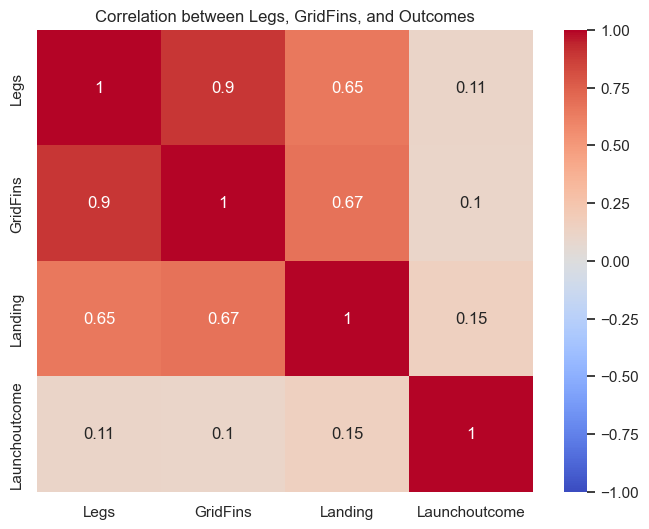

In [152]:
correlation_matrix = df_encoded[['Legs', 'GridFins', 'Landing', 'Launchoutcome']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation between Legs, GridFins, and Outcomes')
plt.show()

In [153]:
best_rf_gridfins = best_models['RandomForest_GridFins']
best_rf_legs = best_models['RandomForest_Legs']

# Predict missing GridFins
df_missing.loc[:, 'GridFins'] = best_rf_gridfins.predict(df_missing[features])

# Predict missing Legs
df_missing.loc[:, 'Legs'] = best_rf_legs.predict(df_missing[features])

In [154]:
# Combine the two datasets
df_complete = pd.concat([df_full, df_missing], axis=0)

df_complete

,Flight_No,Serial_Number,Orbit,Payload_Mass,Launchoutcome,Landing,Longitude,Latitude,Reused,FlightCount,GridFins,Legs,Day,Month,Year,"Launchsite_Cape Canaveral, SLC-40","Launchsite_Kennedy, LC‑39A","Launchsite_Vandenberg, SLC-4E",Block_B4,Block_B5,Block_FT,Block_v1.0,Block_v1.1,Booster_Version_F9 B4,Booster_Version_F9 B5,Booster_Version_F9 FT,Booster_Version_F9 v1.0,Booster_Version_F9 v1.1
2,3,0,5,525.0,1,0,-80.577366,28.561857,0,1,0.0,0.0,1,5,2012,1,0,0,0,0,0,1,0,0,0,0,1,0
4,5,2,5,4877.0,1,0,-80.577366,28.561857,0,1,0.0,0.0,4,3,2013,1,0,0,0,0,0,1,0,0,0,0,1,0
5,6,3,9,500.0,1,0,-120.610829,34.632093,0,1,0.0,0.0,6,9,2013,0,0,1,0,0,0,0,1,0,0,0,0,1
6,7,4,2,3170.0,1,0,-80.577366,28.561857,0,1,0.0,0.0,1,12,2013,1,0,0,0,0,0,0,1,0,0,0,0,1
7,8,5,2,3325.0,1,0,-80.577366,28.561857,0,1,0.0,0.0,0,1,2014,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,61,5,16300.0,1,1,-120.610829,34.632093,0,14,1.0,1.0,2,10,2024,0,0,1,0,1,0,0,0,0,1,0,0,0
387,388,64,5,17100.0,1,1,-80.577366,28.561857,0,14,1.0,1.0,2,10,2024,1,0,0,0,1,0,0,0,0,1,0,0,0
388,389,68,5,2762.0,1,1,-80.603956,28.608058,0,5,1.0,1.0,1,11,2024,0,1,0,0,1,0,0,0,0,1,0,0,0
389,390,69,5,17100.0,1,1,-80.577366,28.561857,0,3,1.0,1.0,3,11,2024,1,0,0,0,1,0,0,0,0,1,0,0,0


In [174]:
df_complete.isnull().sum()

Flight_No                            0
Serial_Number                        0
Orbit                                0
Payload_Mass                         0
Launchoutcome                        0
Landing                              0
Longitude                            0
Latitude                             0
Reused                               0
FlightCount                          0
GridFins                             0
Legs                                 0
Day                                  0
Month                                0
Year                                 0
Launchsite_Cape Canaveral, SLC-40    0
Launchsite_Kennedy, LC‑39A           0
Launchsite_Vandenberg, SLC-4E        0
Block_B4                             0
Block_B5                             0
Block_FT                             0
Block_v1.0                           0
Block_v1.1                           0
Booster_Version_F9 B4                0
Booster_Version_F9 B5                0
Booster_Version_F9 FT    

In [176]:
# Merge the dataframes based on the 'Flight_No' column
# First, create a temporary DataFrame that only 
# has the 'Flight_No', 'GridFins', and 'Legs' columns
temp_df = df_complete[['Flight_No', 'GridFins', 'Legs']]

# Then, merge the temporary DataFrame with df_falcon
# using the 'Flight_No' column as the key
df_falcon = df_falcon.merge(temp_df, on='Flight_No', how='left')

In [178]:
# Copy the dataset to work on it
df_vis = df_falcon.copy()

# Drop rows with missing payload values
df_vis = df_vis.dropna(subset=["Payload_Mass"])

# Drop unncessary columns for data prediction
df_vis = df_vis.drop(["GridFins_x","Legs_x","GridFins_y","Legs_y"], axis=1)

In [180]:
df_vis["Date"] = pd.to_datetime(df_vis["Date"])
df_vis["Day"] = df_vis["Date"].dt.dayofweek # Day of the week (0=Monday, 6=Sunday)
df_vis["Month"] = df_vis["Date"].dt.month
df_vis["Year"] = df_vis["Date"].dt.year

In [182]:
df_vis.isnull().sum()

Flight_No          0
Serial_Number      0
Booster_Version    0
Date               0
Time               0
Customer           0
Orbit              0
Payload_Mass       0
Launchsite         0
Launchoutcome      0
Landing            0
Longitude          0
Latitude           0
Reused             0
FlightCount        0
Block              0
GridFins           0
Legs               0
Day                0
Month              0
Year               0
dtype: int64

## Part 6: Explaratory Data Analysis

Before we develop a model to predict launch success, we need to analyse the data to discover patterns, corrolations and other aspects.

In [186]:
list(df_vis.columns)

['Flight_No',
 'Serial_Number',
 'Booster_Version',
 'Date',
 'Time',
 'Customer',
 'Orbit',
 'Payload_Mass',
 'Launchsite',
 'Launchoutcome',
 'Landing',
 'Longitude',
 'Latitude',
 'Reused',
 'FlightCount',
 'Block',
 'GridFins',
 'Legs',
 'Day',
 'Month',
 'Year']

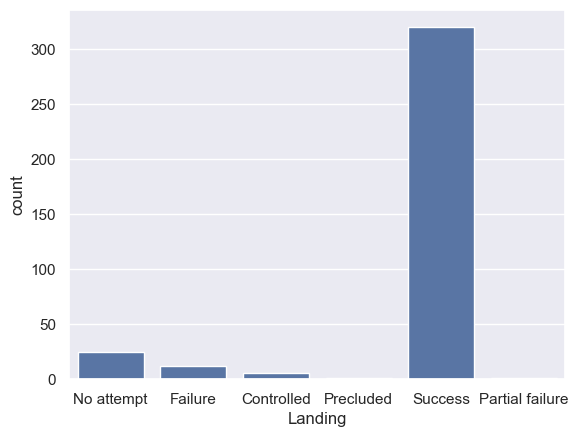

In [188]:
sns.countplot(x='Landing', data=df_vis)
plt.show()

In [190]:
# Apply label encoding for visualization
df_vis["Serial_Number_Encoded"] = le.fit_transform(df_vis["Serial_Number"])
df_vis["Orbit_Encoded"] = le.fit_transform(df_vis["Orbit"])
df_vis["Booster_Version_Encoded"] = le.fit_transform(df_vis["Booster_Version"])
df_vis["Launchsite_Encoded"] = le.fit_transform(df_vis["Launchsite"])
df_vis["Block_Encoded"] = le.fit_transform(df_vis["Block"])
df_vis["Reused_Encoded"] = le.fit_transform(df_vis["Reused"])

In [192]:
df_vis["Landing"] = df_vis["Landing"].apply(lambda x: 1 if 'Success' in x else 0)
df_vis["Launchoutcome"] = df_vis["Launchoutcome"].apply(lambda x: 1 if "Success" in x else 0)

In [194]:
df_vis.columns

Index(['Flight_No', 'Serial_Number', 'Booster_Version', 'Date', 'Time',
       'Customer', 'Orbit', 'Payload_Mass', 'Launchsite', 'Launchoutcome',
       'Landing', 'Longitude', 'Latitude', 'Reused', 'FlightCount', 'Block',
       'GridFins', 'Legs', 'Day', 'Month', 'Year', 'Serial_Number_Encoded',
       'Orbit_Encoded', 'Booster_Version_Encoded', 'Launchsite_Encoded',
       'Block_Encoded', 'Reused_Encoded'],
      dtype='object')

In [196]:
df_vis.dtypes

Flight_No                           int64
Serial_Number                      object
Booster_Version                    object
Date                       datetime64[ns]
Time                               object
Customer                           object
Orbit                              object
Payload_Mass                      float64
Launchsite                         object
Launchoutcome                       int64
Landing                             int64
Longitude                         float64
Latitude                          float64
Reused                             object
FlightCount                         int32
Block                              object
GridFins                          float64
Legs                              float64
Day                                 int32
Month                               int32
Year                                int32
Serial_Number_Encoded               int32
Orbit_Encoded                       int32
Booster_Version_Encoded           

In [198]:
df_vis["Reused_Encoded"] = le.fit_transform(df_vis["Reused"])

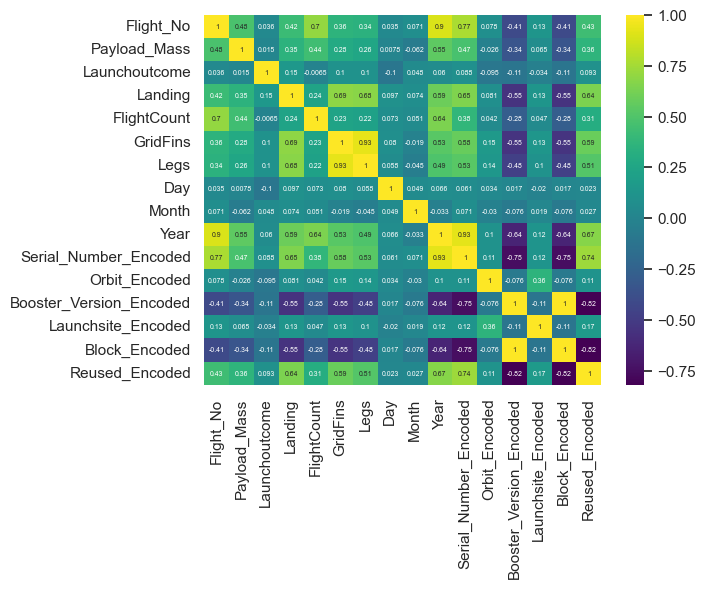

<Figure size 1500x1000 with 0 Axes>

In [200]:
columns_to_include = ['Flight_No','Payload_Mass', 'Launchoutcome',
       'Landing','FlightCount','GridFins', 'Legs', 'Day', 'Month', 
        'Year', 'Serial_Number_Encoded',
       'Orbit_Encoded', 'Booster_Version_Encoded', 'Launchsite_Encoded',
       'Block_Encoded', 'Reused_Encoded']

correlation_matrix = df_vis[columns_to_include].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='viridis',
            annot_kws={'fontsize': 5})

plt.figure(figsize=(15,10))
plt.show()

C:\Users\Furkan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Furkan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.draw()
C:\Users\Furkan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


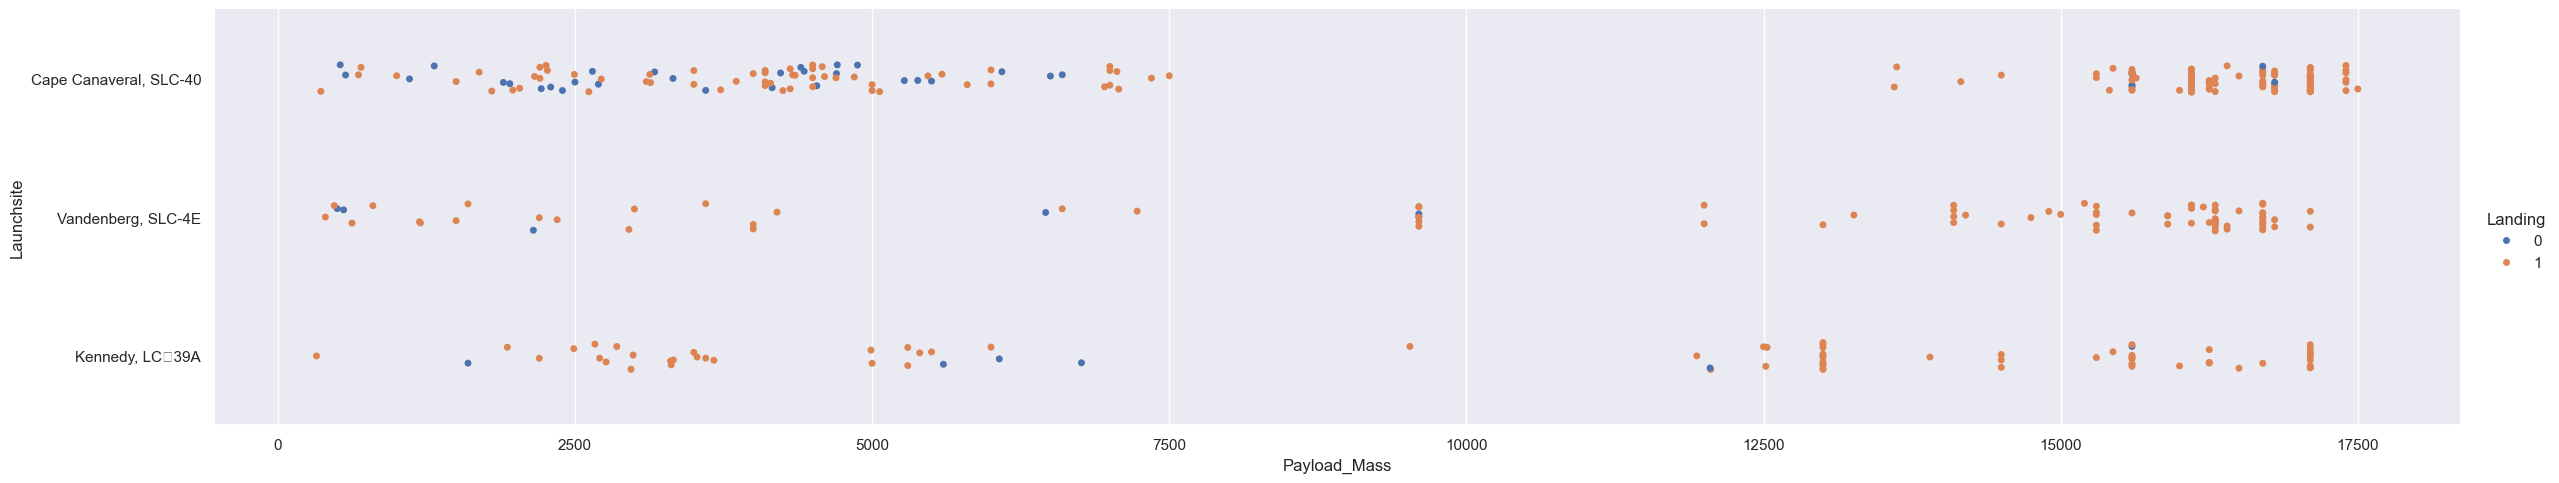

In [202]:
sns.catplot(x='Payload_Mass', y='Launchsite', hue='Landing', data=df_vis,aspect=5)
plt.show()

C:\Users\Furkan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Furkan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.draw()
C:\Users\Furkan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


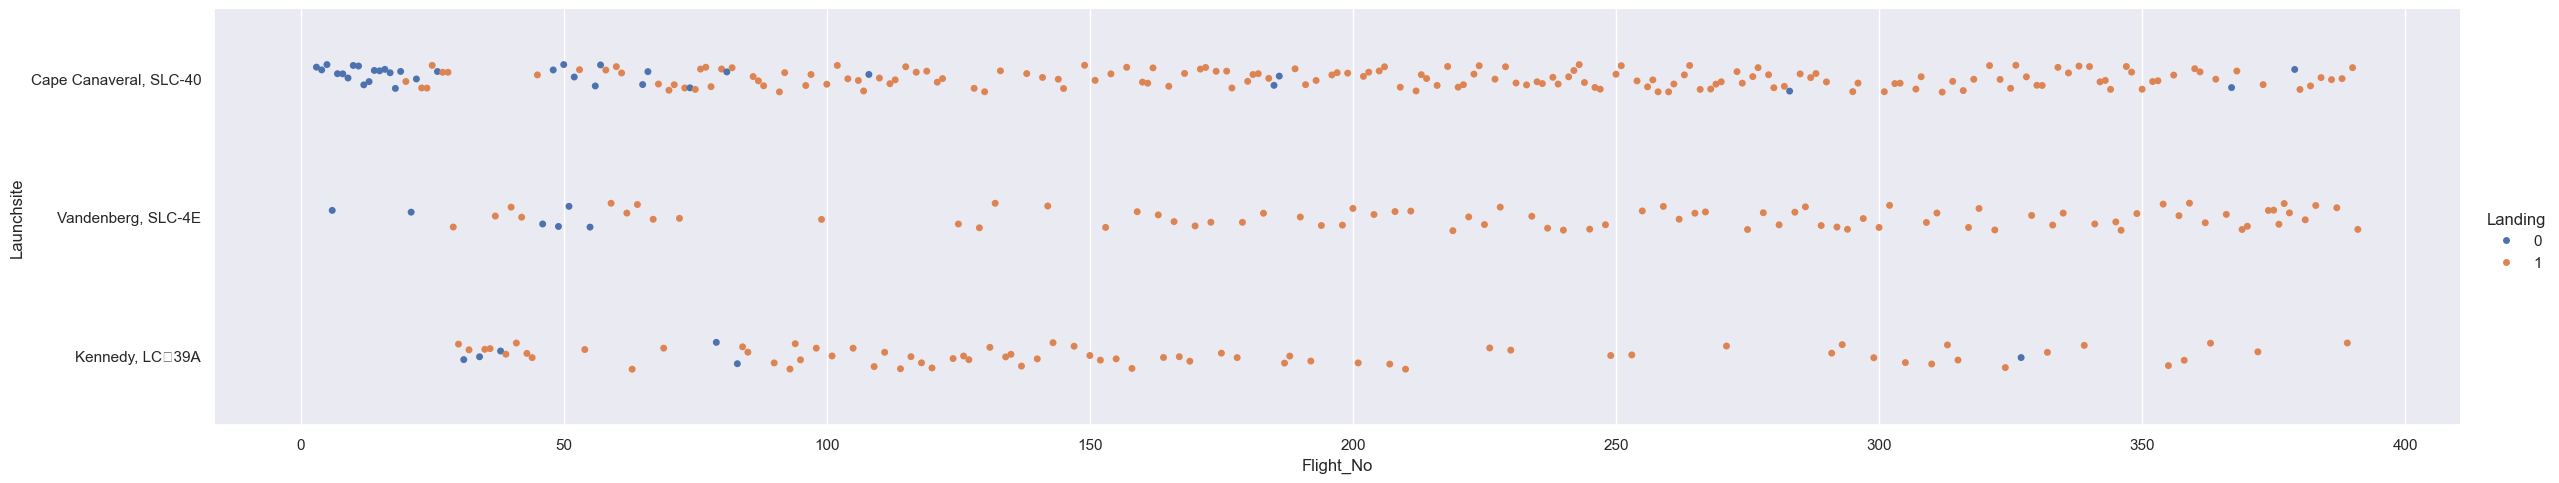

In [203]:
sns.catplot(x='Flight_No', y='Launchsite', hue='Landing', data=df_vis,aspect=5)
plt.show()

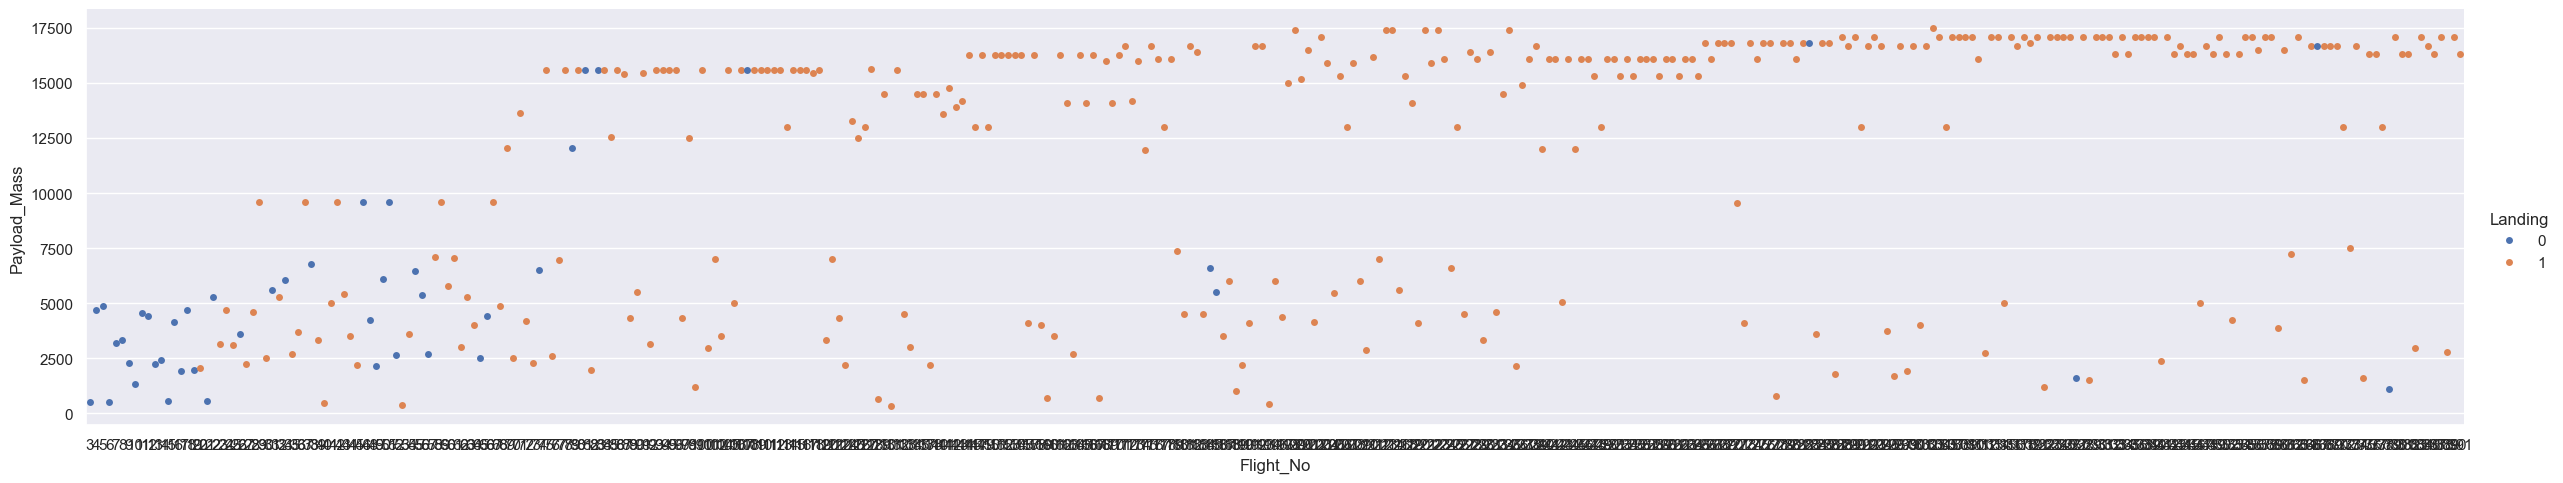

In [204]:
sns.catplot(x='Flight_No', y='Payload_Mass', hue='Landing', data=df_vis,aspect=5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

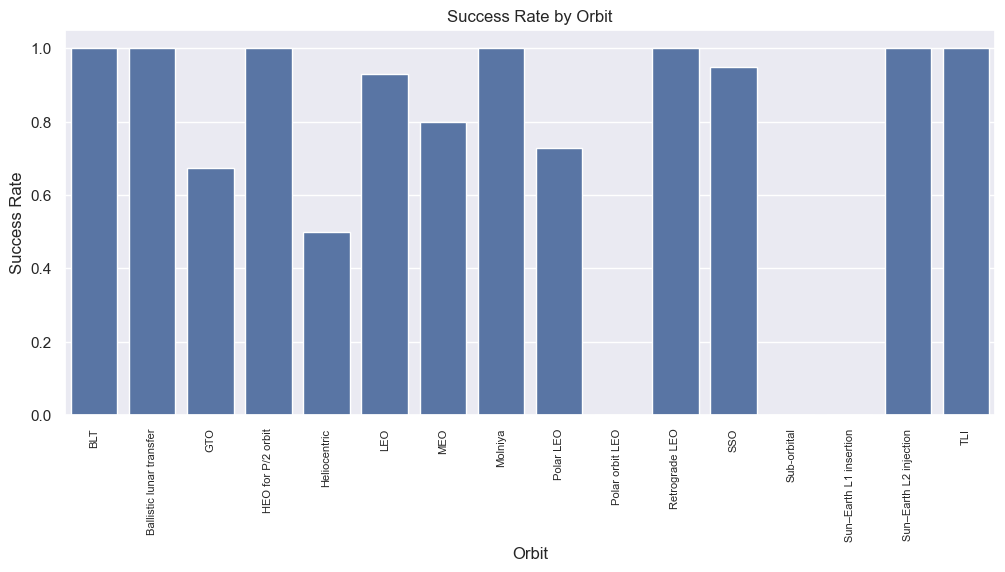

In [206]:
grouped_df = df_vis.groupby('Orbit')['Landing'].mean()
plt.figure(figsize=(12,5))
plt.xticks(rotation=90, fontsize=8) 
sns.barplot(x=grouped_df.index, y=grouped_df.values)
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

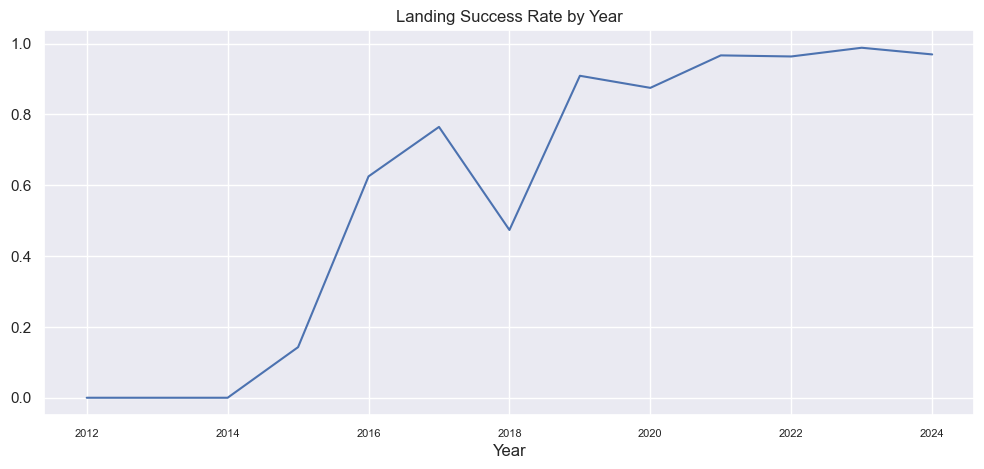

In [208]:
grouped_dfa = df_vis.groupby('Year')['Landing'].mean()
plt.figure(figsize=(12,5))
plt.xticks(rotation=0, fontsize=8) 
sns.lineplot(x=grouped_dfa.index, y=grouped_dfa.values)
plt.title("Landing Success Rate by Year")
plt.show

ValueError: All arrays must be of the same length

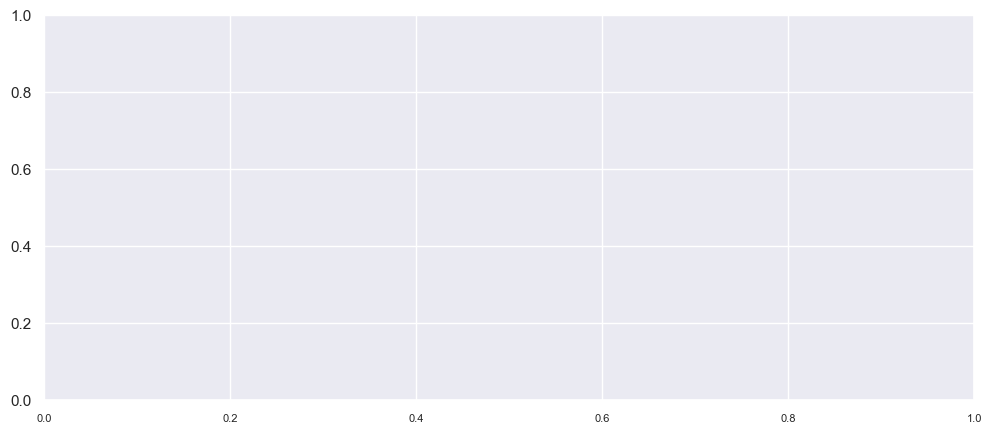

In [209]:
grouped_dfb = df_vis.groupby('Year')['Launchoutcome'].mean()
plt.figure(figsize=(12,5))
plt.xticks(rotation=0, fontsize=8) 
sns.lineplot(x=grouped_df.index, y=grouped_dfb.values)
plt.title("Launch Success Rate by Year")
plt.show

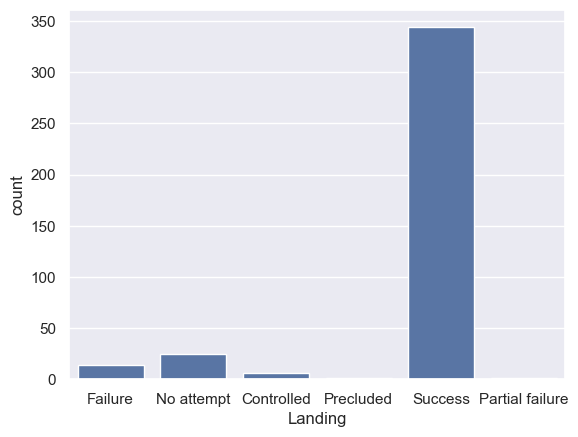

In [224]:
sns.countplot(x='Landing', data=df_falcon)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\Furkan\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Furkan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


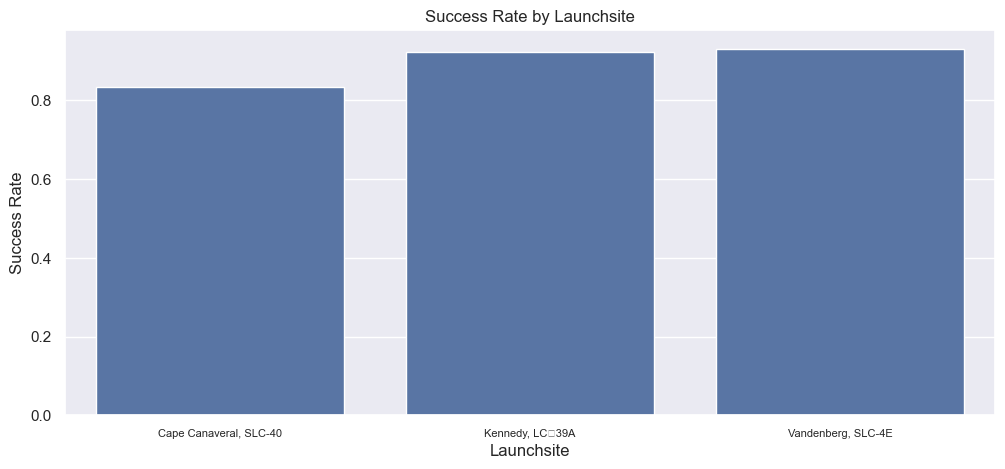

In [226]:
grouped_dfs = df_vis.groupby('Launchsite')['Landing'].mean()
plt.figure(figsize=(12,5))
plt.xticks(rotation=0, fontsize=8) 
sns.barplot(x=grouped_dfs.index, y=grouped_dfs.values)
plt.xlabel('Launchsite')
plt.ylabel('Success Rate')
plt.title('Success Rate by Launchsite')

plt.show

## Part 7: Launch Site Location Analysis

In [229]:
# Import required libraries
import folium

# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

We need to add location on a Folium map for each launch site location using longitude and latitude

In [231]:
# Select features to be used
f_df = df_vis[["Launchsite", "Longitude", "Latitude", "Launchoutcome"]]
launchsite_df = f_df.groupby(["Launchsite"], as_index=False).first()
launchsite_df = launchsite_df[["Launchsite", "Longitude", "Latitude"]]
launchsite_df

,Launchsite,Longitude,Latitude
0,"Cape Canaveral, SLC-40",-80.577366,28.561857
1,"Kennedy, LC‑39A",-80.603956,28.608058
2,"Vandenberg, SLC-4E",-120.610829,34.632093


Next, we will generate a map where the start location is NASA

In [234]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=4)

In [236]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html=f'''<div style="font-size: 12; color:#d35400;text-align: center;
                transform: translate(-50%, -50%);
                width: 60px;">; <b>NASA JSC</b>
                </div>
        ''')
    )
site_map.add_child(circle)
site_map.add_child(marker)

To add the rest of the markers and site names, create a generalized function for adding circle and marker

In [239]:
def add_launch_site(map_obj, latitude, longitude, site_name, radius=1000, circle_color='#d35400', text_color='#d35400'):
    """
    Adds a circle and a marker with a text icon to the specified coordinate on a folium map.
    
    Parameters:
    - map_obj: The folium map object to which the site will be added.
    - latitude: Latitude for the location.
    - longitude: Longitude for the location.
    - site_name: The name of the launch site to display on the marker.
    - radius: Radius of the circle in meters (default is 1000).
    - circle_color: Color of the circle in hex (default is #d35400).
    - text_color: Color of the text label in hex (default is #d35400).
    """
    # Add circle to the map
    circle = folium.Circle(
        location=(latitude, longitude),
        radius=radius,
        color=circle_color,
        fill=True,
        fill_color=circle_color,
    ).add_child(folium.Popup(site_name))
    
    # Add marker with a text label
    marker = folium.Marker(
        location=(latitude, longitude),
        icon=DivIcon(
            icon_size=(20, 20),
            icon_anchor=(0, 0),
             html=f'''
            <div style="
                font-size: 12px;
                color: {text_color};
                text-align: center;
                transform: translate(-50%, -50%);
                width: 60px;">
                <b>{site_name}</b>
            </div>
        ''',
        )
    )
    
    # Add both to the map
    map_obj.add_child(circle)
    map_obj.add_child(marker)

In [241]:
for _, row in launchsite_df.iterrows():
    add_launch_site(site_map, row["Latitude"], row["Longitude"], row["Launchsite"])

site_map

Marker clusters are good for maps that contains many markers

In [269]:
# Create cluster map
marker_cluster = MarkerCluster()

# Add a new column for marker colors to assign color conditionally
df_vis['marker_color'] = np.where(df_vis['Launchoutcome'] == 1, 'green', 'red')
df_vis.head(5)

,Flight_No,Serial_Number,Booster_Version,Date,Time,Customer,Orbit,Payload_Mass,Launchsite,Launchoutcome,Landing,Longitude,Latitude,Reused,FlightCount,Block,GridFins,Legs,Day,Month,Year,Serial_Number_Encoded,Orbit_Encoded,Booster_Version_Encoded,Launchsite_Encoded,Block_Encoded,Reused_Encoded,marker_color
2,3,B0005,F9 v1.0,2012-05-22,07:44:00,NASA,LEO,525.0,"Cape Canaveral, SLC-40",1,0,-80.577366,28.561857,False,1,v1.0,0.0,0.0,1,5,2012,0,5,3,0,3,0,green
3,4,B0006,F9 v1.0,2012-10-08,00:35:00,NASA,LEO,4700.0,"Cape Canaveral, SLC-40",1,0,-80.577366,28.561857,False,1,v1.0,0.0,0.0,0,10,2012,1,5,3,0,3,0,green
4,5,B0007,F9 v1.0,2013-03-01,15:10:00,NASA,LEO,4877.0,"Cape Canaveral, SLC-40",1,0,-80.577366,28.561857,False,1,v1.0,0.0,0.0,4,3,2013,2,5,3,0,3,0,green
5,6,B1003,F9 v1.1,2013-09-29,16:00:00,MDA,Polar orbit LEO,500.0,"Vandenberg, SLC-4E",1,0,-120.610829,34.632093,False,1,v1.1,0.0,0.0,6,9,2013,3,9,4,2,4,0,green
6,7,B1004,F9 v1.1,2013-12-03,22:41:00,SES,GTO,3170.0,"Cape Canaveral, SLC-40",1,0,-80.577366,28.561857,False,1,v1.1,0.0,0.0,1,12,2013,4,2,4,0,4,0,green


Now, we can add a folium.Marker to marker_cluster for each launch result in spacex_df data frame

In [271]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# For each row in df_vis data frame
for index, record in df_vis.iterrows():
    # Create a Marker object with its coordinate
    marker = folium.Marker(
        # Location coordinates [latitude, longitude]
        location=[record['Latitude'], record['Longitude']],
        
        # Customize the marker icon
        icon=folium.Icon(
            color='white',                    # Background color of the marker
            icon_color=record['marker_color'] # Color of the icon
        ),
        
        # Add popup with additional information
        popup=folium.Popup(
            f""";
            Launch Site: {record['Launchsite']}
            Outcome: {'Success' if record['Launchoutcome'] == 1 else 'Failure'}
            """,
            max_width=200
        )
    )
    
    # Add the marker to the cluster
    marker_cluster.add_child(marker)

site_map

We can determine the distances from the launch site to nearby locations. To do this, we can add a MousePosition tool to the map to help you locate coordinates. This will allow you to hover over any point on the map, including railways, and instantly see its coordinates.

In [248]:
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

## Part 8: Developing Predictive Machine Learning Model

There are several task to be done to develop a machine learning model to predict landing success. Since I already developed a model to predict the missing values for the dataset, I do not need to encode any features. Also, I will create a tree-based model so normalization of the payload mass is not necessary.

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [21]:
# Load the dataset (completed dataset after missing feature predictions)
df = pd.read_csv(r"C:\Users\Furkan\Documents\Falcon\spacexcomplete.csv")

In [23]:
df.columns

Index(['Flight_No', 'Serial_Number', 'Orbit', 'Payload_Mass', 'Launchoutcome',
       'Landing', 'Longitude', 'Latitude', 'Reused', 'FlightCount', 'GridFins',
       'Legs', 'Day', 'Month', 'Year', 'Launchsite_Cape Canaveral, SLC-40',
       'Launchsite_Kennedy, LC-39A', 'Launchsite_Vandenberg, SLC-4E',
       'Block_B4', 'Block_B5', 'Block_FT', 'Block_v1.0', 'Block_v1.1',
       'Booster_Version_F9 B4', 'Booster_Version_F9 B5',
       'Booster_Version_F9 FT', 'Booster_Version_F9 v1.0',
       'Booster_Version_F9 v1.1'],
      dtype='object')

In [169]:
# Select features to be included in the model and the target variable
selected_features = [
    'Orbit', 'Payload_Mass', 'GridFins', 'Legs', 'Launchsite_Cape Canaveral, SLC-40', 
    'Launchsite_Kennedy, LC-39A', 'Launchsite_Vandenberg, SLC-4E',
    'Block_B4', 'Block_B5', 'Block_FT', 'Block_v1.0', 'Block_v1.1',
     'Booster_Version_F9 B4', 'Booster_Version_F9 B5',
       'Booster_Version_F9 FT', 'Booster_Version_F9 v1.0',
       'Booster_Version_F9 v1.1'
]

X = df[selected_features] 
y = df["Landing"]

In [171]:
# Train-test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
# Training the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42) # Training the model with 100 trees
model.fit(X_train, y_train) # Fitting the model

RandomForestClassifier(random_state=42)

In [193]:
# Make the predictions
y_pred = model.predict(X_test)

In [195]:
# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.92      0.98      0.95        59

    accuracy                           0.92        73
   macro avg       0.91      0.81      0.85        73
weighted avg       0.92      0.92      0.91        73

Confusion Matrix:
[[ 9  5]
 [ 1 58]]
Accuracy Score:
Accuracy: 0.92


In [201]:
joblib.dump(model, 'spacex_landing_model.pkl')

['spacex_landing_model.pkl']

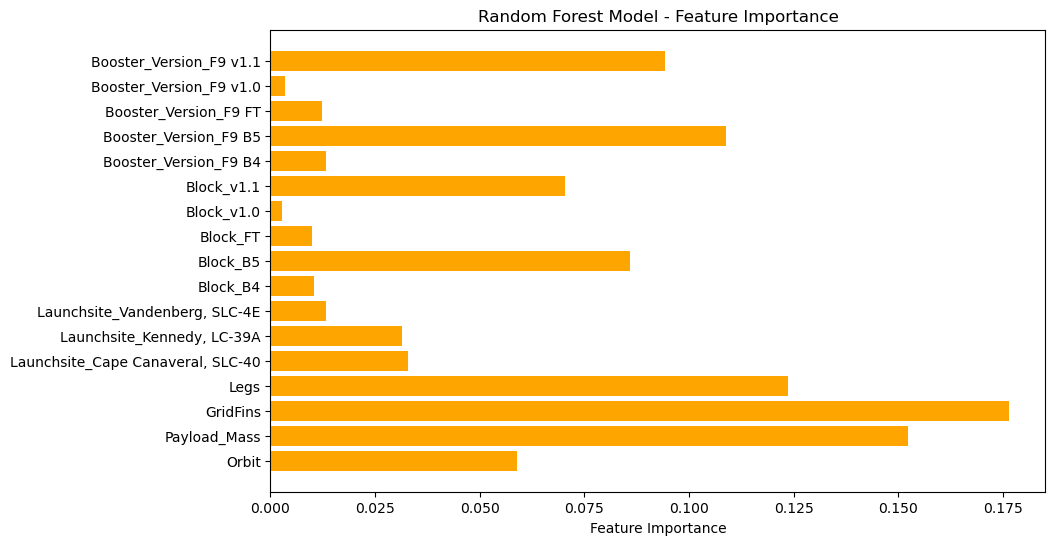

In [199]:
import matplotlib.pyplot as plt
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances, color='orange')
plt.xlabel('Feature Importance')
plt.title('Random Forest Model - Feature Importance')
plt.show()

Based on the evaluation, we can see that the model is biased toward predicting success (1), as evidenced by the high recall for 1 and relatively low recall for 0. Hence, for unsuccessful landings (class 0), recall is 0.71, meaning the model only identifies 71% of actual failures correctly. 

Overall the model is excellent at predicting landing successes (class 1), with a high recall of 0.94 and an F1-score of 0.96. But the model struggles with identifying failures. This could be due to class imbalance (59 successes vs. 14 failures in the test set).

To overcome this issue, I could use techniques like oversampling or undersampling to balance the classes and improve recall for class 0. These are called class balancing techniques. Oversampling involves generating synthetic samples for the minority class to balance the dataset. On the other hand, undersampling reduces the majority class to balance the dataset, though it may discard valuable data.